In [1]:
"""point de vue, on veut augmenter les aides aux personnes ayant un revenu bas"""

'point de vue, on veut augmenter les aides aux personnes ayant un revenu bas'

Description
An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

This is a widely cited KNN dataset. I encountered it during my course, and I wish to share it here because it is a good starter example for data pre-processing and machine learning practices.

Fields
The dataset contains 16 columns
Target filed: Income
-- The income is divide into two classes: 50K
Number of attributes: 14
-- These are the demographics and other features to describe a person

We can explore the possibility in predicting income level based on the individual’s personal information.

Acknowledgements
This dataset named “adult” is found in the UCI machine learning repository
http://www.cs.toronto.edu/~delve/data/adult/desc.html

The detailed description on the dataset can be found in the original UCI documentation
http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html

Attribute Information:

Listing of attributes:

>50K, <=50K.

age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
| Description of fnlwgt (final weight)
|
| The weights on the CPS files are controlled to independent estimates of the
| civilian noninstitutional population of the US. These are prepared monthly
| for us by Population Division here at the Census Bureau. We use 3 sets of
| controls.
| These are:
| 1. A single cell estimate of the population 16+ for each state.
| 2. Controls for Hispanic Origin by age and sex.
| 3. Controls by Race, age and sex.
|
| We use all three sets of controls in our weighting program and "rake" through
| them 6 times so that by the end we come back to all the controls we used.
|
| The term estimate refers to population totals derived from CPS by creating
| "weighted tallies" of any specified socio-economic characteristics of the
| population.
|
| People with similar demographic characteristics should have
| similar weights. There is one important caveat to remember
| about this statement. That is that since the CPS sample is
| actually a collection of 51 state samples, each with its own
| probability of selection, the statement only applies within
| state.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
sns.set()

In [3]:
df=pd.read_csv('adult.csv')

In [4]:
df.shape

(48842, 15)

In [5]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [105]:
to_dummies=[]


In [106]:
to_drop=[]

In [107]:
df.isna().sum()

age                     0
workclass               0
fnlwgt                  0
education               0
educational-num         0
marital-status          0
occupation              0
relationship            0
race                    0
gender                  0
capital-gain            0
capital-loss            0
hours-per-week          0
native-country          0
income                  0
Income_new              0
New_workclass           0
Capital                 0
NativeC               103
Marital_status_new      0
dtype: int64

### Column Income

In [108]:
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [109]:
#Income is the target column. We ill try to predict whether the revenue is higher or o

In [110]:
# create new column with 1 if income is higher than 50K and 0 if lower or equal to 50K
dct={'<=50K':0,'>50K':1}

In [111]:

df['Income_new']=df.income.map(dct)

### Column Age

In [22]:
df.age.unique()

array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87, 86])

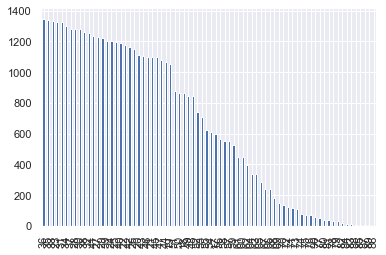

In [23]:
df.age.value_counts().plot(kind='bar')

In [25]:
pd.crosstab(df.age,df.Income_new,normalize='index')

Income_new,0,1
age,,
17,1.000000,0.000000
18,1.000000,0.000000
19,0.997151,0.002849
20,0.999102,0.000898
21,0.994526,0.005474
...,...,...
86,1.000000,0.000000
87,1.000000,0.000000
88,0.833333,0.166667


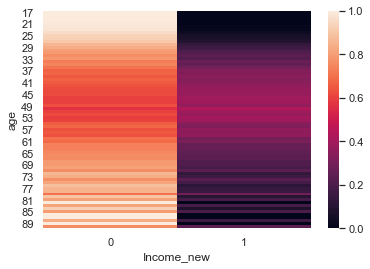

In [24]:
sns.heatmap(pd.crosstab(df.age,df.Income_new,normalize='index'))

In [ ]:
#I will drop 'Age'. Same information can be gathered using occupation. and too many information.t

In [112]:
to_drop.append('age')

### Column workclass

In [28]:
df.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [113]:
df.workclass=df.workclass.str.replace('?','Unknown')

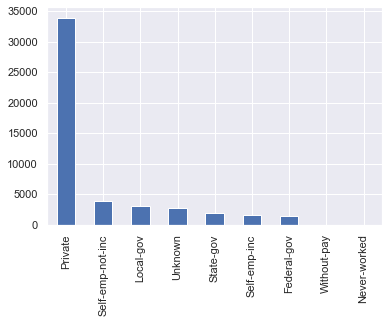

In [114]:
df.workclass.value_counts().plot(kind='bar')

In [115]:
df.workclass.unique()

array(['Private', 'Local-gov', 'Unknown', 'Self-emp-not-inc',
       'Federal-gov', 'State-gov', 'Self-emp-inc', 'Without-pay',
       'Never-worked'], dtype=object)

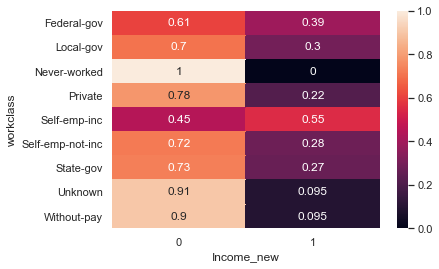

In [116]:
sns.heatmap(pd.crosstab(df.workclass,df.Income_new,normalize='index'),annot=True)
#workclass has an impact on Income. For the model we could keep all values however we will gather government related classes
#together, Private, self emp inc and self emp not inc alone, without pay and never worked together.

In [33]:
dct_workclass={'Without-pay':'No_income','Never-worked':'No_income','State-gov':'gov_related_income','Federal-gov':'gov_related_income','Local-gov':'gov_related_income','Private':'Private','Unknown':'Unknown','Self-emp-not-inc':'Self-emp-not-inc','Self-emp-inc':'Self-emp-inc'}

In [34]:
df['New_workclass']=df.workclass.map(dct_workclass)

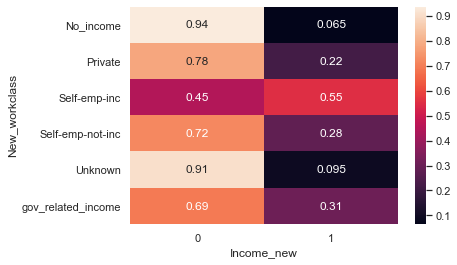

In [35]:
sns.heatmap(pd.crosstab(df.New_workclass,df.Income_new,normalize='index'),annot=True)

In [119]:
#put it to dummies. Cannot rank them it as I do not know the d
to_dummies.append('New_workclass')

In [37]:
#strange cases in workclass to study later
df[df.workclass=='Without-pay'].Income_new
df.iloc[8903]
df.iloc[10647]

age                                50
workclass                 Without-pay
fnlwgt                         123004
education                     HS-grad
educational-num                     9
marital-status     Married-civ-spouse
occupation          Machine-op-inspct
relationship                Own-child
race                            White
gender                         Female
capital-gain                        0
capital-loss                     1887
hours-per-week                     40
native-country          United-States
income                           >50K
Income_new                          1
New_workclass               No_income
Name: 10647, dtype: object

### Column fnlwgt

In [38]:
#Too many unique values to be used as it is for the modeling. May give us an idea of whether the sampling is correct. 
df.fnlwgt.nunique()

28523

In [118]:
# too many unique values
to_drop.append('fnlwgt')

### Columns Capital

In [40]:
df['capital-gain'].value_counts()

0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
2387         1
22040        1
6612         1
1111         1
1639         1
Name: capital-gain, Length: 123, dtype: int64

In [41]:
df['capital-loss'].value_counts()

0       46560
1902      304
1977      253
1887      233
2415       72
        ...  
1539        1
2489        1
2201        1
1421        1
1870        1
Name: capital-loss, Length: 99, dtype: int64

In [42]:
#Merge Capital Gain and capital Loss in 1 column.
df['Capital']=df['capital-gain']-df['capital-loss']

### Columns Native country

In [43]:
df['native-country'].nunique()

42

In [44]:
df['native-country'].value_counts()


#Mainly a US data. The other country data may not be significant vs. US. ==> study on us only

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

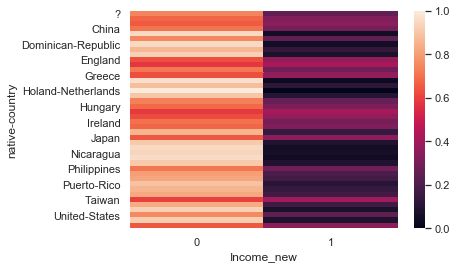

In [45]:
sns.heatmap(pd.crosstab(df['native-country'],df.Income_new,normalize='index'))
#Too many values to conclude

In [46]:
df['native-country']=df['native-country'].str.replace('?','Unknown')

In [47]:
pd.crosstab(df['native-country'],df.Income_new,normalize='index').round(2)

Income_new,0,1
native-country,,
Cambodia,0.68,0.32
Canada,0.65,0.35
China,0.70,0.30
Columbia,0.95,0.05
Cuba,0.75,0.25
Dominican-Republic,0.95,0.05
Ecuador,0.87,0.13
El-Salvador,0.93,0.07
England,0.63,0.37


In [48]:
dct_country={
'United-States': 'US',
'Mexico':'Mexico',
'Unknown':'Unknown',
'Philippines':'Philippines',
'Germany':'Europe',
'Puerto-Rico':'Caraibes',
'Canada':'Canada',
'El-Salvador':'South-America',
'India':'India',
'Cuba':'Cuba',
'England':'Europe',
'China':'China',
'South':'Other',
'Jamaica':'Caraibes',
'Italy' :'Europe',
'Dominican-Republic ':'Caraibes',
'Japan':'Asia',
"Guatemala":'South-America',
'Poland':'Europe',
'Vietnam':'Asia',
'Columbia' :'Other',
'Haiti':'Caraibes', 
'Portugal':'Europe',
'Taiwan':'Asia',
'Iran':'Other',
'Greece':'Europe', 
'Nicaragua':'South-America',
'Peru':'South-America',
'Ecuador':'South-America',
'France':'Europe',
'Ireland':'Europe',
'Thailand':'Asia',
'Hong': 'Asia',
'Cambodia':'Asia',
'Trinadad&Tobago':'Caraibes',
'Outlying-US(Guam-USVI-etc)':'Other',
'Laos':'Asia',
'Yugoslavia':'Europe',
'Scotland':'Europe',
'Honduras':'South-America',
'Hungary':'Europe', 
'Holand-Netherlands':'Europe',
}

In [49]:
# keep only the United states related  rows
df['NativeC']=df['native-country'].map(dct_country)

In [50]:
df['NativeC'].value_counts()

US               43832
Mexico             951
Unknown            857
Europe             780
South-America      403
Caraibes           392
Asia               354
Philippines        295
Other              282
Canada             182
India              151
Cuba               138
China              122
Name: NativeC, dtype: int64

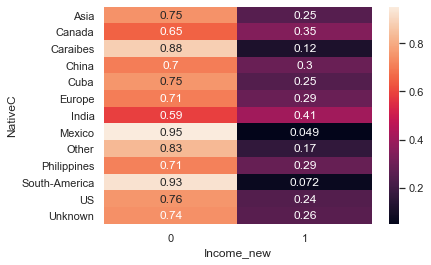

In [51]:
sns.heatmap(pd.crosstab(df['NativeC'],df.Income_new,normalize='index'),annot=True)

In [117]:
to_dummies.append('NativeC')

### Columns marital-status and relationship

In [53]:
df['marital-status'].value_counts()
#being in a relationship may influence the way you accept or not job evolution/opportunities . May not need details like spouse civ or in the Army Force.

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [54]:
dct_status={
'Married-civ-spouse':'Married',
'Never-married': 'Single',
'Divorced': 'Divorced',
'Separated':'Single',
'Widowed'  :'Single',
'Married-spouse-absent':'Married',
'Married-AF-spouse':'Married'
}


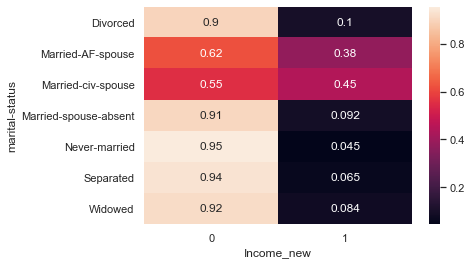

In [55]:
sns.heatmap(pd.crosstab(df['marital-status'],df.Income_new,normalize='index'),annot=True)
#marital status seems to have an impact on the target so I keep it. 
#I will study two models one with all sub categories and one with Married (same home) and not married or separated home
#

In [56]:
df['Marital_status_new']=df['marital-status'].map(dct_status)

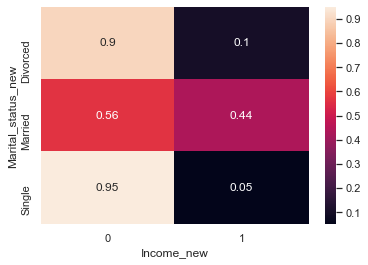

In [57]:
sns.heatmap(pd.crosstab(df['Marital_status_new'],df.Income_new,normalize='index'),annot=True)

In [58]:
#relationship to be checked with marital-status
df.relationship.value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [59]:
"""To do correlation between marital status and  relationship"""

'To do correlation between marital status and  relationship'

In [120]:
#if we keep Marital status , we may not need relationship as it does not bring much more information. TBC
to_drop.append('relationship')

### Column hours-per-week

In [61]:
df['hours-per-week'].unique()
#There may be people which have to work. 
"""Find how to handle this columns. Range??? Maybe two work"""

'Find how to handle this columns. Range??? Maybe two work'

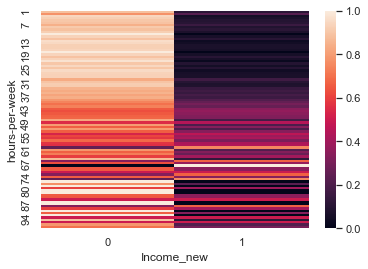

In [62]:
sns.heatmap(pd.crosstab(df['hours-per-week'],df.Income_new,normalize='index'))


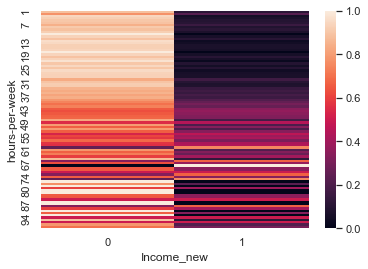

In [63]:
sns.heatmap(pd.crosstab(df['hours-per-week'],df.Income_new,normalize='index'))

In [64]:
df['hours-per-week'].nunique()

96

In [121]:
to_drop.append('hours-per-week')
# too many different values, do not know if its for 1 job or two. job info can be get from occupation.

### Column Gender

In [65]:
df.gender.value_counts()


Male      32650
Female    16192
Name: gender, dtype: int64

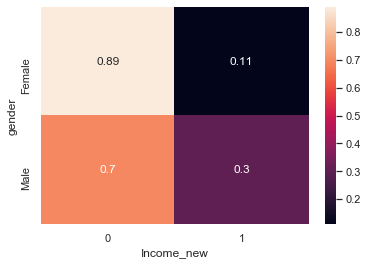

In [66]:
sns.heatmap(pd.crosstab(df['gender'],df.Income_new,normalize='index'),annot=True)

In [122]:
to_dummies.append('gender')

### Column Race

In [68]:

df.race.unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

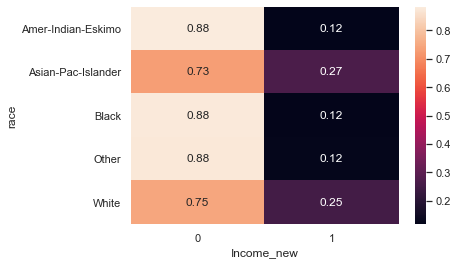

In [69]:
sns.heatmap(pd.crosstab(df['race'],df.Income_new,normalize='index'),annot=True)

In [123]:
to_dummies.append('race')

### Columns Education and Education-num

In [71]:
df['educational-num'].value_counts()

9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: educational-num, dtype: int64

In [72]:
df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [73]:
# I keep df['educational-num'] which is already ranked


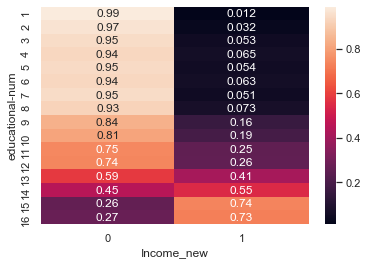

In [74]:
sns.heatmap(pd.crosstab(df['educational-num'],df.Income_new,normalize='index'),annot=True)
# Clearly the higher level of education reach the higher you are likely to have an income higher than 50%



### Column Occupation

In [75]:
df.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [76]:
df['occupation']=df['occupation'].str.replace('?','Unknown')

In [77]:
df.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Unknown              2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

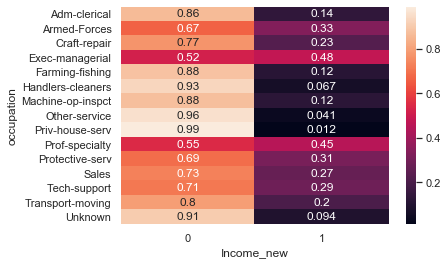

In [78]:
sns.heatmap(pd.crosstab(df['occupation'],df.Income_new,normalize='index'),annot=True)

In [124]:
to_dummies.append('occupation')

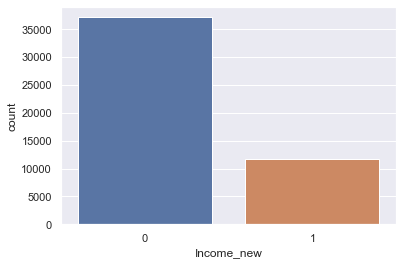

In [80]:
sns.countplot(df.Income_new)
#binomial distribution

In [125]:
to_drop=list(set(to_drop))
to_drop

['fnlwgt', 'age', 'hours-per-week', 'relationship']

In [126]:
to_drop

['fnlwgt', 'age', 'hours-per-week', 'relationship']

In [127]:
df1=df.drop(to_drop,axis=1)

In [128]:
df1.columns

Index(['workclass', 'education', 'educational-num', 'marital-status',
       'occupation', 'race', 'gender', 'capital-gain', 'capital-loss',
       'native-country', 'income', 'Income_new', 'New_workclass', 'Capital',
       'NativeC', 'Marital_status_new'],
      dtype='object')

In [130]:
df2=df1[['educational-num','occupation', 'race', 'gender','New_workclass',
       'Income_new','Capital', 'NativeC', 'Marital_status_new']]
df2

,educational-num,occupation,race,gender,New_workclass,Income_new,Capital,NativeC,Marital_status_new
0,7,Machine-op-inspct,Black,Male,Private,0,0,US,Single
1,9,Farming-fishing,White,Male,Private,0,0,US,Married
2,12,Protective-serv,White,Male,gov_related_income,1,0,US,Married
3,10,Machine-op-inspct,Black,Male,Private,1,7688,US,Married
4,10,Unknown,White,Female,Unknown,0,0,US,Single
...,...,...,...,...,...,...,...,...,...
48837,12,Tech-support,White,Female,Private,0,0,US,Married
48838,9,Machine-op-inspct,White,Male,Private,1,0,US,Married
48839,9,Adm-clerical,White,Female,Private,0,0,US,Single
48840,9,Adm-clerical,White,Male,Private,0,0,US,Single


In [132]:
#to_dummies.extend(['age','hours-per-week','Marital_status_new'])
to_dummies.append('Marital_status_new')

In [133]:
to_dummies=list(set(to_dummies))
to_dummies

['NativeC',
 'occupation',
 'race',
 'New_workclass',
 'gender',
 'Marital_status_new']

In [134]:
df3=pd.get_dummies(data=df2, columns=to_dummies,drop_first=True)

In [136]:
df3.shape

(48842, 41)

In [147]:
to_dummies.append('age')

In [150]:
df4=df[['age','educational-num','occupation', 'race', 'gender','New_workclass',
       'Income_new','Capital', 'NativeC', 'Marital_status_new']]

In [151]:
df4=pd.get_dummies(data=df4, columns=to_dummies,drop_first=True)

In [162]:
df5=df[['educational-num','occupation', 'race', 'gender','New_workclass',
       'Income_new','Capital', 'NativeC', 'Marital_status_new']]

In [164]:
df5=df5.replace('Unknown',np.NaN)


In [165]:
df5.isnull().sum()

educational-num          0
occupation            2809
race                     0
gender                   0
New_workclass         2799
Income_new               0
Capital                  0
NativeC                960
Marital_status_new       0
dtype: int64

In [171]:
to_dummies.remove('age')

In [169]:
df5=df5.dropna()

In [172]:
df5=pd.get_dummies(data=df5, columns=to_dummies,drop_first=True)

In [173]:
df5.shape

(45125, 38)

In [180]:
df5.Capital.value_counts()

 0        39200
 15024      498
 7688       391
 7298       351
-1902       294
          ...  
 22040        1
-2201         1
-1421         1
 1639         1
 2387         1
Name: Capital, Length: 217, dtype: int64

In [183]:
df6=df5.drop('Capital',axis=1)

In [184]:
df6.shape

(45125, 37)

# Modelling

In [90]:
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

from statsmodels.formula.api import ols
from statsmodels.api import OLS
from statsmodels.api import add_constant

In [142]:
# Lanceur de models
model_list=['LogisticRegression','GaussianNB','DecisionTreeClassifier','RandomForestClassifier','SVC','AdaBoostClassifier','CatBoostClassifier']

#Ecrire uen classe abvec les modeles
def LaunchAllModels(model_list):
    results=[]
    for i in model_list:
        model=eval(f'{i}()')
        model.fit(X1_train,y1_train)
        y_pred=model.predict(X1_test)
        conf=confusion_matrix(y1_test,y_pred)
        print(f'Model{i}')
        display(conf)
        acc=accuracy_score(y1_test,y_pred)
        rec=recall_score(y1_test,y_pred)
        pr=precision_score(y1_test,y_pred)
        f1=f1_score(y1_test,y_pred)
        print(f'acc: {acc},pr:{pr},rec:{rec},f1:{f1}')
        results.append([i,acc,rec,pr,f1])
    return results
results3=LaunchAllModels(model_list)            

ModelLogisticRegression


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[11533,   852],
       [ 1751,  2145]])

acc: 0.8401203857256925,pr:0.7157157157157157,rec:0.550564681724846,f1:0.6223705208182213
ModelGaussianNB


array([[11108,  1277],
       [ 1429,  2467]])

acc: 0.8337939929979731,pr:0.6589209401709402,rec:0.6332135523613963,f1:0.6458115183246073
ModelDecisionTreeClassifier


array([[11564,   821],
       [ 1563,  2333]])

acc: 0.8535716479331736,pr:0.7396956246036779,rec:0.5988193018480493,f1:0.6618439716312057
ModelRandomForestClassifier


array([[11504,   881],
       [ 1555,  2341]])

acc: 0.8503777409250046,pr:0.7265673494723774,rec:0.6008726899383984,f1:0.6577690362461367
ModelSVC


array([[12003,   382],
       [ 2834,  1062]])

acc: 0.8024691358024691,pr:0.7354570637119113,rec:0.27258726899383984,f1:0.39775280898876403
ModelAdaBoostClassifier


array([[11675,   710],
       [ 1626,  2270]])

acc: 0.8565198697868681,pr:0.761744966442953,rec:0.5826488706365504,f1:0.6602675974403723
Learning rate set to 0.045589
0:	learn: 0.6481725	total: 26.7ms	remaining: 26.7s
1:	learn: 0.6099061	total: 57.4ms	remaining: 28.7s
2:	learn: 0.5763919	total: 82.2ms	remaining: 27.3s
3:	learn: 0.5473571	total: 133ms	remaining: 33s
4:	learn: 0.5218488	total: 200ms	remaining: 39.8s
5:	learn: 0.4989855	total: 248ms	remaining: 41s
6:	learn: 0.4800441	total: 284ms	remaining: 40.3s
7:	learn: 0.4626982	total: 320ms	remaining: 39.7s
8:	learn: 0.4480205	total: 355ms	remaining: 39.1s
9:	learn: 0.4350337	total: 399ms	remaining: 39.5s
10:	learn: 0.4239358	total: 448ms	remaining: 40.3s
11:	learn: 0.4136546	total: 480ms	remaining: 39.5s
12:	learn: 0.4047186	total: 514ms	remaining: 39s
13:	learn: 0.3972324	total: 545ms	remaining: 38.4s
14:	learn: 0.3902371	total: 585ms	remaining: 38.4s
15:	learn: 0.3839992	total: 618ms	remaining: 38s
16:	learn: 0.3786573	total: 661ms	remaining: 38.2s
17:	learn: 0.3738489	total: 

161:	learn: 0.3017267	total: 6.55s	remaining: 33.9s
162:	learn: 0.3016556	total: 6.58s	remaining: 33.8s
163:	learn: 0.3015468	total: 6.6s	remaining: 33.7s
164:	learn: 0.3014960	total: 6.63s	remaining: 33.5s
165:	learn: 0.3013849	total: 6.65s	remaining: 33.4s
166:	learn: 0.3012230	total: 6.68s	remaining: 33.3s
167:	learn: 0.3011584	total: 6.7s	remaining: 33.2s
168:	learn: 0.3010950	total: 6.73s	remaining: 33.1s
169:	learn: 0.3010347	total: 6.75s	remaining: 33s
170:	learn: 0.3008876	total: 6.79s	remaining: 32.9s
171:	learn: 0.3007788	total: 6.81s	remaining: 32.8s
172:	learn: 0.3006359	total: 6.83s	remaining: 32.7s
173:	learn: 0.3005842	total: 6.87s	remaining: 32.6s
174:	learn: 0.3005337	total: 6.89s	remaining: 32.5s
175:	learn: 0.3004688	total: 6.91s	remaining: 32.4s
176:	learn: 0.3003987	total: 6.94s	remaining: 32.3s
177:	learn: 0.3003320	total: 6.98s	remaining: 32.2s
178:	learn: 0.3002655	total: 7.02s	remaining: 32.2s
179:	learn: 0.3002289	total: 7.08s	remaining: 32.2s
180:	learn: 0.30

327:	learn: 0.2898267	total: 12.2s	remaining: 25s
328:	learn: 0.2898070	total: 12.2s	remaining: 25s
329:	learn: 0.2897557	total: 12.3s	remaining: 24.9s
330:	learn: 0.2897068	total: 12.3s	remaining: 24.9s
331:	learn: 0.2896801	total: 12.3s	remaining: 24.8s
332:	learn: 0.2896318	total: 12.4s	remaining: 24.7s
333:	learn: 0.2894962	total: 12.4s	remaining: 24.7s
334:	learn: 0.2894218	total: 12.4s	remaining: 24.6s
335:	learn: 0.2893913	total: 12.4s	remaining: 24.6s
336:	learn: 0.2893535	total: 12.5s	remaining: 24.5s
337:	learn: 0.2892924	total: 12.5s	remaining: 24.5s
338:	learn: 0.2892487	total: 12.5s	remaining: 24.5s
339:	learn: 0.2892113	total: 12.6s	remaining: 24.4s
340:	learn: 0.2891913	total: 12.6s	remaining: 24.4s
341:	learn: 0.2891545	total: 12.7s	remaining: 24.3s
342:	learn: 0.2891312	total: 12.7s	remaining: 24.3s
343:	learn: 0.2890873	total: 12.7s	remaining: 24.3s
344:	learn: 0.2890339	total: 12.7s	remaining: 24.2s
345:	learn: 0.2889673	total: 12.8s	remaining: 24.2s
346:	learn: 0.28

488:	learn: 0.2832598	total: 17.1s	remaining: 17.9s
489:	learn: 0.2832371	total: 17.1s	remaining: 17.8s
490:	learn: 0.2832167	total: 17.1s	remaining: 17.8s
491:	learn: 0.2831845	total: 17.2s	remaining: 17.7s
492:	learn: 0.2831526	total: 17.2s	remaining: 17.7s
493:	learn: 0.2831222	total: 17.2s	remaining: 17.6s
494:	learn: 0.2830906	total: 17.3s	remaining: 17.6s
495:	learn: 0.2830560	total: 17.3s	remaining: 17.6s
496:	learn: 0.2830224	total: 17.3s	remaining: 17.5s
497:	learn: 0.2830074	total: 17.4s	remaining: 17.5s
498:	learn: 0.2829918	total: 17.4s	remaining: 17.4s
499:	learn: 0.2829716	total: 17.4s	remaining: 17.4s
500:	learn: 0.2829556	total: 17.4s	remaining: 17.4s
501:	learn: 0.2829232	total: 17.5s	remaining: 17.3s
502:	learn: 0.2828944	total: 17.5s	remaining: 17.3s
503:	learn: 0.2828654	total: 17.5s	remaining: 17.2s
504:	learn: 0.2828603	total: 17.5s	remaining: 17.2s
505:	learn: 0.2828277	total: 17.6s	remaining: 17.2s
506:	learn: 0.2827941	total: 17.6s	remaining: 17.1s
507:	learn: 

650:	learn: 0.2791569	total: 22.3s	remaining: 12s
651:	learn: 0.2791352	total: 22.3s	remaining: 11.9s
652:	learn: 0.2791086	total: 22.4s	remaining: 11.9s
653:	learn: 0.2790875	total: 22.4s	remaining: 11.9s
654:	learn: 0.2790726	total: 22.4s	remaining: 11.8s
655:	learn: 0.2790617	total: 22.5s	remaining: 11.8s
656:	learn: 0.2790446	total: 22.5s	remaining: 11.7s
657:	learn: 0.2790278	total: 22.5s	remaining: 11.7s
658:	learn: 0.2790151	total: 22.6s	remaining: 11.7s
659:	learn: 0.2789889	total: 22.6s	remaining: 11.6s
660:	learn: 0.2789787	total: 22.6s	remaining: 11.6s
661:	learn: 0.2789609	total: 22.6s	remaining: 11.6s
662:	learn: 0.2789497	total: 22.7s	remaining: 11.5s
663:	learn: 0.2789249	total: 22.7s	remaining: 11.5s
664:	learn: 0.2789135	total: 22.7s	remaining: 11.5s
665:	learn: 0.2788763	total: 22.8s	remaining: 11.4s
666:	learn: 0.2788593	total: 22.8s	remaining: 11.4s
667:	learn: 0.2788479	total: 22.8s	remaining: 11.3s
668:	learn: 0.2788309	total: 22.8s	remaining: 11.3s
669:	learn: 0.

809:	learn: 0.2761905	total: 27.1s	remaining: 6.36s
810:	learn: 0.2761642	total: 27.3s	remaining: 6.35s
811:	learn: 0.2761539	total: 27.3s	remaining: 6.33s
812:	learn: 0.2761346	total: 27.4s	remaining: 6.29s
813:	learn: 0.2761293	total: 27.4s	remaining: 6.26s
814:	learn: 0.2761248	total: 27.4s	remaining: 6.22s
815:	learn: 0.2761137	total: 27.4s	remaining: 6.19s
816:	learn: 0.2760984	total: 27.5s	remaining: 6.15s
817:	learn: 0.2760884	total: 27.5s	remaining: 6.12s
818:	learn: 0.2760654	total: 27.5s	remaining: 6.08s
819:	learn: 0.2760558	total: 27.6s	remaining: 6.05s
820:	learn: 0.2760299	total: 27.6s	remaining: 6.01s
821:	learn: 0.2760160	total: 27.6s	remaining: 5.98s
822:	learn: 0.2760108	total: 27.7s	remaining: 5.95s
823:	learn: 0.2759861	total: 27.7s	remaining: 5.92s
824:	learn: 0.2759808	total: 27.7s	remaining: 5.88s
825:	learn: 0.2759631	total: 27.8s	remaining: 5.85s
826:	learn: 0.2759383	total: 27.8s	remaining: 5.82s
827:	learn: 0.2759080	total: 27.8s	remaining: 5.78s
828:	learn: 

968:	learn: 0.2737920	total: 33.1s	remaining: 1.06s
969:	learn: 0.2737719	total: 33.2s	remaining: 1.03s
970:	learn: 0.2737534	total: 33.3s	remaining: 993ms
971:	learn: 0.2737437	total: 33.3s	remaining: 959ms
972:	learn: 0.2737292	total: 33.3s	remaining: 925ms
973:	learn: 0.2737114	total: 33.4s	remaining: 891ms
974:	learn: 0.2736929	total: 33.4s	remaining: 857ms
975:	learn: 0.2736855	total: 33.5s	remaining: 823ms
976:	learn: 0.2736728	total: 33.5s	remaining: 789ms
977:	learn: 0.2736574	total: 33.5s	remaining: 754ms
978:	learn: 0.2736426	total: 33.6s	remaining: 720ms
979:	learn: 0.2736323	total: 33.6s	remaining: 686ms
980:	learn: 0.2736178	total: 33.6s	remaining: 651ms
981:	learn: 0.2736065	total: 33.7s	remaining: 617ms
982:	learn: 0.2735912	total: 33.7s	remaining: 583ms
983:	learn: 0.2735742	total: 33.7s	remaining: 548ms
984:	learn: 0.2735580	total: 33.8s	remaining: 514ms
985:	learn: 0.2735450	total: 33.8s	remaining: 480ms
986:	learn: 0.2735363	total: 33.9s	remaining: 446ms
987:	learn: 

array([[11708,   677],
       [ 1498,  2398]])

acc: 0.8664086972544685,pr:0.7798373983739837,rec:0.6155030800821355,f1:0.687993114330799


In [143]:
#without age and hour
results3=pd.DataFrame(results3)
results3.columns=['Model Name','Accuracy','Recall','Precision','F-measure']
results3.round(3)

,Model Name,Accuracy,Recall,Precision,F-measure
0,LogisticRegression,0.840,0.551,0.716,0.622
1,GaussianNB,0.834,0.633,0.659,0.646
2,DecisionTreeClassifier,0.854,0.599,0.740,0.662
3,RandomForestClassifier,0.850,0.601,0.727,0.658
4,SVC,0.802,0.273,0.735,0.398
5,AdaBoostClassifier,0.857,0.583,0.762,0.660
6,CatBoostClassifier,0.866,0.616,0.780,0.688


In [137]:
#with age and hour
results2=pd.DataFrame(results)
results2.columns=['Model Name','Accuracy','Recall','Precision','F-measure']
results2.round(3)

,Model Name,Accuracy,Recall,Precision,F-measure
0,LogisticRegression,0.847,0.566,0.732,0.638
1,GaussianNB,0.812,0.756,0.583,0.658
2,DecisionTreeClassifier,0.824,0.604,0.640,0.622
3,RandomForestClassifier,0.849,0.601,0.721,0.656
4,SVC,0.802,0.273,0.735,0.398
5,AdaBoostClassifier,0.858,0.594,0.761,0.667
6,CatBoostClassifier,0.873,0.636,0.794,0.706


In [ ]:
# splitting  dataset into train and test 
X_train, X_test,y_train,y_test = train_test_split(df2.drop('Income_new',axis=1), \
                                                  df.Income_new, \
                                                  test_size=1/3, \
                                                  random_state=42, \
                                                  stratify=df.Income_new)

In [141]:
# splitting  dataset into train and test 1
X1_train, X1_test,y1_train,y1_test = train_test_split(df3.drop('Income_new',axis=1), \
                                                  df3.Income_new, \
                                                  test_size=1/3, \
                                                  random_state=42, \
                                                  stratify=df3.Income_new)

In [96]:
"""results1=pd.DataFrame([['LogisticRegression',
  0.8476752042257847,
  0.5980492813141683,
  0.718249075215783,
  0.6526610644257703],
 ['GaussianNB',
  0.8213868926970088,
  0.7143223819301848,
  0.607907383136741,
  0.6568326646211942],
 ['DecisionTreeClassifier',
  0.8264848596523555,
  0.6029260780287474,
  0.6476426799007444,
  0.62448491293367],
 ['RandomForestClassifier',
  0.8459554081444629,
  0.5924024640657084,
  0.7149938042131351,
  0.647950589556429],
 ['SVC',
  0.8024691358024691,
  0.27258726899383984,
  0.7354570637119113,
  0.39775280898876403],
 ['AdaBoostClassifier',
  0.8583625084454272,
  0.6013860369609856,
  0.7567829457364341,
  0.6701945080091533],
 ['CatBoostClassifier',
  0.8722437196732388,
  0.635523613963039,
  0.7895408163265306,
  0.7042093287827076]])"""

"results1=pd.DataFrame([['LogisticRegression',\n  0.8476752042257847,\n  0.5980492813141683,\n  0.718249075215783,\n  0.6526610644257703],\n ['GaussianNB',\n  0.8213868926970088,\n  0.7143223819301848,\n  0.607907383136741,\n  0.6568326646211942],\n ['DecisionTreeClassifier',\n  0.8264848596523555,\n  0.6029260780287474,\n  0.6476426799007444,\n  0.62448491293367],\n ['RandomForestClassifier',\n  0.8459554081444629,\n  0.5924024640657084,\n  0.7149938042131351,\n  0.647950589556429],\n ['SVC',\n  0.8024691358024691,\n  0.27258726899383984,\n  0.7354570637119113,\n  0.39775280898876403],\n ['AdaBoostClassifier',\n  0.8583625084454272,\n  0.6013860369609856,\n  0.7567829457364341,\n  0.6701945080091533],\n ['CatBoostClassifier',\n  0.8722437196732388,\n  0.635523613963039,\n  0.7895408163265306,\n  0.7042093287827076]])"

In [ ]:
#from xgboost import XGBClassifier
#could not be loaded
""" verifier comment faire pour mac"""

### Logistic Regression

In [100]:
# need numeric data 'calcul of distance'
model1=LogisticRegression(max_iter=1e8)
model1.fit(X1_train,y1_train)
y_pred1=model1.predict(X1_test)
conf1=confusion_matrix(y1_test,y_pred1)
display(conf1)
acc1=accuracy_score(y1_test,y_pred1)
rec1=recall_score(y1_test,y_pred1)
pr1=precision_score(y1_test,y_pred1)
f11=f1_score(y1_test,y_pred1)
print(f'acc1: {acc1},rec1:{rec1},pr1:{pr1},f11:{f11}')

array([[11541,   844],
       [ 1609,  2287]])

acc1: 0.8493335790184878,rec1:0.5870123203285421,pr1:0.7304375598850208,f11:0.6509178881457237


### Feature selection test/trial

In [154]:
sfs1=sfs(LogisticRegression(),k_features=7,forward=True,floating=False,scoring='r2',cv=0)
sfs1.fit(df4.drop('Income_new',axis=1),df4.Income_new)
sfs1.k_feature_names_

('Capital',
 'NativeC_Canada',
 'NativeC_Caraibes',
 'NativeC_China',
 'NativeC_Cuba',
 'NativeC_Europe',
 'age_24')

In [161]:
sfs2=sfs(CatBoostClassifier(),k_features=7,forward=True,floating=False,scoring='r2',cv=0)
sfs2.fit(X1_train,y1_train)
sfs2.k_feature_names_

Learning rate set to 0.045589
0:	learn: 0.6729497	total: 44.2ms	remaining: 44.2s
1:	learn: 0.6547963	total: 103ms	remaining: 51.6s
2:	learn: 0.6378248	total: 140ms	remaining: 46.6s
3:	learn: 0.6225429	total: 177ms	remaining: 44s
4:	learn: 0.6095211	total: 194ms	remaining: 38.6s
5:	learn: 0.5970972	total: 239ms	remaining: 39.5s
6:	learn: 0.5861119	total: 259ms	remaining: 36.7s
7:	learn: 0.5768472	total: 276ms	remaining: 34.2s
8:	learn: 0.5682349	total: 307ms	remaining: 33.8s
9:	learn: 0.5603093	total: 323ms	remaining: 32s
10:	learn: 0.5530072	total: 340ms	remaining: 30.6s
11:	learn: 0.5466967	total: 369ms	remaining: 30.4s
12:	learn: 0.5408082	total: 393ms	remaining: 29.9s
13:	learn: 0.5355524	total: 431ms	remaining: 30.4s
14:	learn: 0.5308208	total: 465ms	remaining: 30.5s
15:	learn: 0.5268610	total: 496ms	remaining: 30.5s
16:	learn: 0.5232056	total: 525ms	remaining: 30.4s
17:	learn: 0.5197378	total: 560ms	remaining: 30.5s
18:	learn: 0.5166133	total: 593ms	remaining: 30.6s
19:	learn: 0.5

160:	learn: 0.4867588	total: 3.95s	remaining: 20.6s
161:	learn: 0.4867581	total: 3.98s	remaining: 20.6s
162:	learn: 0.4867581	total: 3.99s	remaining: 20.5s
163:	learn: 0.4867574	total: 4s	remaining: 20.4s
164:	learn: 0.4867573	total: 4.01s	remaining: 20.3s
165:	learn: 0.4867557	total: 4.03s	remaining: 20.3s
166:	learn: 0.4867556	total: 4.04s	remaining: 20.2s
167:	learn: 0.4867554	total: 4.06s	remaining: 20.1s
168:	learn: 0.4867548	total: 4.07s	remaining: 20s
169:	learn: 0.4867546	total: 4.09s	remaining: 20s
170:	learn: 0.4867538	total: 4.11s	remaining: 19.9s
171:	learn: 0.4867536	total: 4.13s	remaining: 19.9s
172:	learn: 0.4867531	total: 4.14s	remaining: 19.8s
173:	learn: 0.4867519	total: 4.17s	remaining: 19.8s
174:	learn: 0.4867516	total: 4.18s	remaining: 19.7s
175:	learn: 0.4867514	total: 4.19s	remaining: 19.6s
176:	learn: 0.4867504	total: 4.21s	remaining: 19.6s
177:	learn: 0.4867490	total: 4.23s	remaining: 19.5s
178:	learn: 0.4867485	total: 4.24s	remaining: 19.5s
179:	learn: 0.48674

320:	learn: 0.4867255	total: 7.14s	remaining: 15.1s
321:	learn: 0.4867255	total: 7.16s	remaining: 15.1s
322:	learn: 0.4867255	total: 7.17s	remaining: 15s
323:	learn: 0.4867254	total: 7.19s	remaining: 15s
324:	learn: 0.4867254	total: 7.21s	remaining: 15s
325:	learn: 0.4867253	total: 7.22s	remaining: 14.9s
326:	learn: 0.4867253	total: 7.24s	remaining: 14.9s
327:	learn: 0.4867252	total: 7.25s	remaining: 14.9s
328:	learn: 0.4867251	total: 7.27s	remaining: 14.8s
329:	learn: 0.4867251	total: 7.29s	remaining: 14.8s
330:	learn: 0.4867250	total: 7.3s	remaining: 14.8s
331:	learn: 0.4867250	total: 7.31s	remaining: 14.7s
332:	learn: 0.4867250	total: 7.33s	remaining: 14.7s
333:	learn: 0.4867249	total: 7.36s	remaining: 14.7s
334:	learn: 0.4867248	total: 7.37s	remaining: 14.6s
335:	learn: 0.4867248	total: 7.39s	remaining: 14.6s
336:	learn: 0.4867248	total: 7.41s	remaining: 14.6s
337:	learn: 0.4867247	total: 7.42s	remaining: 14.5s
338:	learn: 0.4867247	total: 7.43s	remaining: 14.5s
339:	learn: 0.48672

491:	learn: 0.4867232	total: 10.3s	remaining: 10.6s
492:	learn: 0.4867232	total: 10.3s	remaining: 10.6s
493:	learn: 0.4867232	total: 10.3s	remaining: 10.6s
494:	learn: 0.4867232	total: 10.4s	remaining: 10.6s
495:	learn: 0.4867232	total: 10.4s	remaining: 10.5s
496:	learn: 0.4867232	total: 10.4s	remaining: 10.5s
497:	learn: 0.4867232	total: 10.4s	remaining: 10.5s
498:	learn: 0.4867232	total: 10.4s	remaining: 10.5s
499:	learn: 0.4867232	total: 10.4s	remaining: 10.4s
500:	learn: 0.4867232	total: 10.4s	remaining: 10.4s
501:	learn: 0.4867232	total: 10.5s	remaining: 10.4s
502:	learn: 0.4867232	total: 10.5s	remaining: 10.4s
503:	learn: 0.4867232	total: 10.5s	remaining: 10.3s
504:	learn: 0.4867232	total: 10.5s	remaining: 10.3s
505:	learn: 0.4867232	total: 10.5s	remaining: 10.3s
506:	learn: 0.4867232	total: 10.6s	remaining: 10.3s
507:	learn: 0.4867232	total: 10.6s	remaining: 10.2s
508:	learn: 0.4867232	total: 10.6s	remaining: 10.2s
509:	learn: 0.4867232	total: 10.6s	remaining: 10.2s
510:	learn: 

662:	learn: 0.4867230	total: 13s	remaining: 6.62s
663:	learn: 0.4867230	total: 13s	remaining: 6.6s
664:	learn: 0.4867230	total: 13.1s	remaining: 6.58s
665:	learn: 0.4867230	total: 13.1s	remaining: 6.56s
666:	learn: 0.4867230	total: 13.1s	remaining: 6.53s
667:	learn: 0.4867230	total: 13.1s	remaining: 6.51s
668:	learn: 0.4867230	total: 13.1s	remaining: 6.49s
669:	learn: 0.4867230	total: 13.1s	remaining: 6.47s
670:	learn: 0.4867230	total: 13.1s	remaining: 6.44s
671:	learn: 0.4867230	total: 13.2s	remaining: 6.42s
672:	learn: 0.4867230	total: 13.2s	remaining: 6.4s
673:	learn: 0.4867230	total: 13.2s	remaining: 6.38s
674:	learn: 0.4867230	total: 13.2s	remaining: 6.35s
675:	learn: 0.4867230	total: 13.2s	remaining: 6.33s
676:	learn: 0.4867230	total: 13.2s	remaining: 6.31s
677:	learn: 0.4867230	total: 13.2s	remaining: 6.29s
678:	learn: 0.4867230	total: 13.2s	remaining: 6.26s
679:	learn: 0.4867230	total: 13.3s	remaining: 6.24s
680:	learn: 0.4867230	total: 13.3s	remaining: 6.22s
681:	learn: 0.4867

832:	learn: 0.4867230	total: 15.5s	remaining: 3.1s
833:	learn: 0.4867230	total: 15.5s	remaining: 3.09s
834:	learn: 0.4867230	total: 15.5s	remaining: 3.07s
835:	learn: 0.4867230	total: 15.6s	remaining: 3.05s
836:	learn: 0.4867230	total: 15.6s	remaining: 3.03s
837:	learn: 0.4867230	total: 15.6s	remaining: 3.01s
838:	learn: 0.4867230	total: 15.6s	remaining: 2.99s
839:	learn: 0.4867230	total: 15.6s	remaining: 2.97s
840:	learn: 0.4867230	total: 15.6s	remaining: 2.96s
841:	learn: 0.4867230	total: 15.6s	remaining: 2.94s
842:	learn: 0.4867230	total: 15.7s	remaining: 2.92s
843:	learn: 0.4867230	total: 15.7s	remaining: 2.9s
844:	learn: 0.4867230	total: 15.7s	remaining: 2.88s
845:	learn: 0.4867230	total: 15.7s	remaining: 2.86s
846:	learn: 0.4867230	total: 15.7s	remaining: 2.84s
847:	learn: 0.4867230	total: 15.7s	remaining: 2.82s
848:	learn: 0.4867230	total: 15.7s	remaining: 2.8s
849:	learn: 0.4867230	total: 15.8s	remaining: 2.78s
850:	learn: 0.4867230	total: 15.8s	remaining: 2.76s
851:	learn: 0.4

999:	learn: 0.4867230	total: 18s	remaining: 0us
Learning rate set to 0.045589
0:	learn: 0.6708352	total: 25.2ms	remaining: 25.2s
1:	learn: 0.6506210	total: 52.6ms	remaining: 26.2s
2:	learn: 0.6314182	total: 77.2ms	remaining: 25.7s
3:	learn: 0.6155848	total: 106ms	remaining: 26.4s
4:	learn: 0.5999407	total: 133ms	remaining: 26.5s
5:	learn: 0.5869401	total: 156ms	remaining: 25.9s
6:	learn: 0.5749172	total: 185ms	remaining: 26.3s
7:	learn: 0.5639683	total: 208ms	remaining: 25.8s
8:	learn: 0.5540578	total: 246ms	remaining: 27.1s
9:	learn: 0.5455020	total: 312ms	remaining: 30.9s
10:	learn: 0.5376551	total: 346ms	remaining: 31.1s
11:	learn: 0.5305841	total: 375ms	remaining: 30.9s
12:	learn: 0.5241054	total: 395ms	remaining: 30s
13:	learn: 0.5181274	total: 420ms	remaining: 29.6s
14:	learn: 0.5131276	total: 443ms	remaining: 29.1s
15:	learn: 0.5086081	total: 472ms	remaining: 29s
16:	learn: 0.5043625	total: 495ms	remaining: 28.6s
17:	learn: 0.5004608	total: 530ms	remaining: 28.9s
18:	learn: 0.49

165:	learn: 0.4412647	total: 4.68s	remaining: 23.5s
166:	learn: 0.4412367	total: 4.71s	remaining: 23.5s
167:	learn: 0.4411315	total: 4.74s	remaining: 23.5s
168:	learn: 0.4410874	total: 4.77s	remaining: 23.4s
169:	learn: 0.4410720	total: 4.79s	remaining: 23.4s
170:	learn: 0.4410084	total: 4.82s	remaining: 23.4s
171:	learn: 0.4409332	total: 4.85s	remaining: 23.3s
172:	learn: 0.4409196	total: 4.87s	remaining: 23.3s
173:	learn: 0.4408816	total: 4.91s	remaining: 23.3s
174:	learn: 0.4408385	total: 4.94s	remaining: 23.3s
175:	learn: 0.4407159	total: 4.96s	remaining: 23.2s
176:	learn: 0.4406280	total: 4.99s	remaining: 23.2s
177:	learn: 0.4405869	total: 5.01s	remaining: 23.2s
178:	learn: 0.4405483	total: 5.04s	remaining: 23.1s
179:	learn: 0.4405343	total: 5.06s	remaining: 23.1s
180:	learn: 0.4404504	total: 5.1s	remaining: 23.1s
181:	learn: 0.4403928	total: 5.12s	remaining: 23s
182:	learn: 0.4403206	total: 5.14s	remaining: 23s
183:	learn: 0.4402922	total: 5.17s	remaining: 22.9s
184:	learn: 0.440

326:	learn: 0.4349204	total: 9.52s	remaining: 19.6s
327:	learn: 0.4348775	total: 9.55s	remaining: 19.6s
328:	learn: 0.4348611	total: 9.57s	remaining: 19.5s
329:	learn: 0.4348576	total: 9.6s	remaining: 19.5s
330:	learn: 0.4348524	total: 9.64s	remaining: 19.5s
331:	learn: 0.4348466	total: 9.66s	remaining: 19.4s
332:	learn: 0.4348422	total: 9.69s	remaining: 19.4s
333:	learn: 0.4347383	total: 9.71s	remaining: 19.4s
334:	learn: 0.4347167	total: 9.74s	remaining: 19.3s
335:	learn: 0.4346750	total: 9.78s	remaining: 19.3s
336:	learn: 0.4346570	total: 9.8s	remaining: 19.3s
337:	learn: 0.4346366	total: 9.83s	remaining: 19.3s
338:	learn: 0.4346215	total: 9.86s	remaining: 19.2s
339:	learn: 0.4345844	total: 9.88s	remaining: 19.2s
340:	learn: 0.4345834	total: 9.91s	remaining: 19.1s
341:	learn: 0.4345616	total: 9.93s	remaining: 19.1s
342:	learn: 0.4344905	total: 9.96s	remaining: 19.1s
343:	learn: 0.4344532	total: 9.99s	remaining: 19.1s
344:	learn: 0.4344515	total: 10s	remaining: 19s
345:	learn: 0.4344

489:	learn: 0.4315108	total: 14.6s	remaining: 15.2s
490:	learn: 0.4315046	total: 14.7s	remaining: 15.2s
491:	learn: 0.4314843	total: 14.7s	remaining: 15.2s
492:	learn: 0.4314767	total: 14.7s	remaining: 15.2s
493:	learn: 0.4314759	total: 14.8s	remaining: 15.1s
494:	learn: 0.4314454	total: 14.8s	remaining: 15.1s
495:	learn: 0.4314331	total: 14.9s	remaining: 15.1s
496:	learn: 0.4314168	total: 14.9s	remaining: 15.1s
497:	learn: 0.4313900	total: 15s	remaining: 15.1s
498:	learn: 0.4313284	total: 15s	remaining: 15.1s
499:	learn: 0.4313199	total: 15.1s	remaining: 15.1s
500:	learn: 0.4313189	total: 15.1s	remaining: 15.1s
501:	learn: 0.4312995	total: 15.2s	remaining: 15.1s
502:	learn: 0.4312909	total: 15.2s	remaining: 15.1s
503:	learn: 0.4312873	total: 15.3s	remaining: 15s
504:	learn: 0.4312841	total: 15.3s	remaining: 15s
505:	learn: 0.4312480	total: 15.3s	remaining: 15s
506:	learn: 0.4312418	total: 15.4s	remaining: 15s
507:	learn: 0.4312360	total: 15.4s	remaining: 14.9s
508:	learn: 0.4312350	to

651:	learn: 0.4301910	total: 20.9s	remaining: 11.2s
652:	learn: 0.4301894	total: 21s	remaining: 11.1s
653:	learn: 0.4301881	total: 21s	remaining: 11.1s
654:	learn: 0.4301776	total: 21s	remaining: 11.1s
655:	learn: 0.4301771	total: 21.1s	remaining: 11s
656:	learn: 0.4301713	total: 21.1s	remaining: 11s
657:	learn: 0.4301673	total: 21.1s	remaining: 11s
658:	learn: 0.4301657	total: 21.2s	remaining: 10.9s
659:	learn: 0.4301481	total: 21.2s	remaining: 10.9s
660:	learn: 0.4301362	total: 21.2s	remaining: 10.9s
661:	learn: 0.4301348	total: 21.2s	remaining: 10.8s
662:	learn: 0.4301221	total: 21.3s	remaining: 10.8s
663:	learn: 0.4301176	total: 21.3s	remaining: 10.8s
664:	learn: 0.4301146	total: 21.3s	remaining: 10.7s
665:	learn: 0.4301134	total: 21.3s	remaining: 10.7s
666:	learn: 0.4301105	total: 21.4s	remaining: 10.7s
667:	learn: 0.4301065	total: 21.4s	remaining: 10.6s
668:	learn: 0.4300964	total: 21.4s	remaining: 10.6s
669:	learn: 0.4300942	total: 21.4s	remaining: 10.6s
670:	learn: 0.4300866	to

816:	learn: 0.4295662	total: 27.6s	remaining: 6.18s
817:	learn: 0.4295653	total: 27.6s	remaining: 6.15s
818:	learn: 0.4295635	total: 27.7s	remaining: 6.12s
819:	learn: 0.4295528	total: 27.7s	remaining: 6.09s
820:	learn: 0.4295513	total: 27.8s	remaining: 6.06s
821:	learn: 0.4295509	total: 27.8s	remaining: 6.03s
822:	learn: 0.4295459	total: 27.9s	remaining: 5.99s
823:	learn: 0.4295454	total: 27.9s	remaining: 5.96s
824:	learn: 0.4295437	total: 28s	remaining: 5.93s
825:	learn: 0.4295340	total: 28s	remaining: 5.9s
826:	learn: 0.4295309	total: 28.1s	remaining: 5.87s
827:	learn: 0.4295270	total: 28.1s	remaining: 5.84s
828:	learn: 0.4295232	total: 28.1s	remaining: 5.81s
829:	learn: 0.4295213	total: 28.2s	remaining: 5.77s
830:	learn: 0.4295198	total: 28.2s	remaining: 5.74s
831:	learn: 0.4295115	total: 28.2s	remaining: 5.7s
832:	learn: 0.4295081	total: 28.3s	remaining: 5.67s
833:	learn: 0.4295064	total: 28.3s	remaining: 5.63s
834:	learn: 0.4295050	total: 28.3s	remaining: 5.6s
835:	learn: 0.42950

975:	learn: 0.4292119	total: 33.9s	remaining: 834ms
976:	learn: 0.4292119	total: 34s	remaining: 799ms
977:	learn: 0.4292111	total: 34s	remaining: 765ms
978:	learn: 0.4292111	total: 34s	remaining: 730ms
979:	learn: 0.4292108	total: 34.1s	remaining: 695ms
980:	learn: 0.4292103	total: 34.1s	remaining: 661ms
981:	learn: 0.4292066	total: 34.2s	remaining: 626ms
982:	learn: 0.4292061	total: 34.2s	remaining: 591ms
983:	learn: 0.4292053	total: 34.2s	remaining: 557ms
984:	learn: 0.4292028	total: 34.3s	remaining: 522ms
985:	learn: 0.4292028	total: 34.3s	remaining: 487ms
986:	learn: 0.4291986	total: 34.4s	remaining: 453ms
987:	learn: 0.4291986	total: 34.4s	remaining: 418ms
988:	learn: 0.4291959	total: 34.4s	remaining: 383ms
989:	learn: 0.4291939	total: 34.5s	remaining: 348ms
990:	learn: 0.4291923	total: 34.5s	remaining: 313ms
991:	learn: 0.4291908	total: 34.5s	remaining: 278ms
992:	learn: 0.4291907	total: 34.5s	remaining: 243ms
993:	learn: 0.4291888	total: 34.6s	remaining: 209ms
994:	learn: 0.4291

147:	learn: 0.5501894	total: 2.05s	remaining: 11.8s
148:	learn: 0.5501894	total: 2.06s	remaining: 11.8s
149:	learn: 0.5501894	total: 2.08s	remaining: 11.8s
150:	learn: 0.5501894	total: 2.09s	remaining: 11.8s
151:	learn: 0.5501894	total: 2.1s	remaining: 11.7s
152:	learn: 0.5501894	total: 2.11s	remaining: 11.7s
153:	learn: 0.5501894	total: 2.12s	remaining: 11.6s
154:	learn: 0.5501894	total: 2.13s	remaining: 11.6s
155:	learn: 0.5501894	total: 2.14s	remaining: 11.6s
156:	learn: 0.5501894	total: 2.15s	remaining: 11.5s
157:	learn: 0.5501894	total: 2.16s	remaining: 11.5s
158:	learn: 0.5501894	total: 2.17s	remaining: 11.5s
159:	learn: 0.5501894	total: 2.18s	remaining: 11.4s
160:	learn: 0.5501894	total: 2.19s	remaining: 11.4s
161:	learn: 0.5501894	total: 2.2s	remaining: 11.4s
162:	learn: 0.5501894	total: 2.21s	remaining: 11.3s
163:	learn: 0.5501894	total: 2.22s	remaining: 11.3s
164:	learn: 0.5501894	total: 2.23s	remaining: 11.3s
165:	learn: 0.5501894	total: 2.23s	remaining: 11.2s
166:	learn: 0.

321:	learn: 0.5501894	total: 4.08s	remaining: 8.59s
322:	learn: 0.5501894	total: 4.09s	remaining: 8.57s
323:	learn: 0.5501894	total: 4.1s	remaining: 8.55s
324:	learn: 0.5501894	total: 4.11s	remaining: 8.54s
325:	learn: 0.5501894	total: 4.12s	remaining: 8.52s
326:	learn: 0.5501894	total: 4.13s	remaining: 8.49s
327:	learn: 0.5501894	total: 4.14s	remaining: 8.47s
328:	learn: 0.5501894	total: 4.15s	remaining: 8.46s
329:	learn: 0.5501894	total: 4.16s	remaining: 8.45s
330:	learn: 0.5501894	total: 4.17s	remaining: 8.43s
331:	learn: 0.5501894	total: 4.18s	remaining: 8.41s
332:	learn: 0.5501894	total: 4.19s	remaining: 8.39s
333:	learn: 0.5501894	total: 4.2s	remaining: 8.37s
334:	learn: 0.5501894	total: 4.2s	remaining: 8.35s
335:	learn: 0.5501894	total: 4.22s	remaining: 8.33s
336:	learn: 0.5501894	total: 4.23s	remaining: 8.32s
337:	learn: 0.5501894	total: 4.24s	remaining: 8.3s
338:	learn: 0.5501894	total: 4.25s	remaining: 8.28s
339:	learn: 0.5501894	total: 4.25s	remaining: 8.26s
340:	learn: 0.55

484:	learn: 0.5501894	total: 6.52s	remaining: 6.92s
485:	learn: 0.5501894	total: 6.54s	remaining: 6.91s
486:	learn: 0.5501894	total: 6.55s	remaining: 6.9s
487:	learn: 0.5501894	total: 6.57s	remaining: 6.89s
488:	learn: 0.5501894	total: 6.59s	remaining: 6.89s
489:	learn: 0.5501894	total: 6.62s	remaining: 6.89s
490:	learn: 0.5501894	total: 6.64s	remaining: 6.88s
491:	learn: 0.5501894	total: 6.66s	remaining: 6.87s
492:	learn: 0.5501894	total: 6.68s	remaining: 6.87s
493:	learn: 0.5501894	total: 6.69s	remaining: 6.86s
494:	learn: 0.5501894	total: 6.71s	remaining: 6.84s
495:	learn: 0.5501894	total: 6.72s	remaining: 6.83s
496:	learn: 0.5501894	total: 6.74s	remaining: 6.82s
497:	learn: 0.5501894	total: 6.76s	remaining: 6.81s
498:	learn: 0.5501894	total: 6.77s	remaining: 6.8s
499:	learn: 0.5501894	total: 6.79s	remaining: 6.79s
500:	learn: 0.5501894	total: 6.8s	remaining: 6.78s
501:	learn: 0.5501894	total: 6.82s	remaining: 6.77s
502:	learn: 0.5501894	total: 6.84s	remaining: 6.76s
503:	learn: 0.5

646:	learn: 0.5501894	total: 9.21s	remaining: 5.03s
647:	learn: 0.5501894	total: 9.22s	remaining: 5.01s
648:	learn: 0.5501894	total: 9.23s	remaining: 4.99s
649:	learn: 0.5501894	total: 9.25s	remaining: 4.98s
650:	learn: 0.5501894	total: 9.26s	remaining: 4.96s
651:	learn: 0.5501894	total: 9.27s	remaining: 4.95s
652:	learn: 0.5501894	total: 9.28s	remaining: 4.93s
653:	learn: 0.5501894	total: 9.29s	remaining: 4.91s
654:	learn: 0.5501894	total: 9.29s	remaining: 4.89s
655:	learn: 0.5501894	total: 9.31s	remaining: 4.88s
656:	learn: 0.5501894	total: 9.32s	remaining: 4.87s
657:	learn: 0.5501894	total: 9.34s	remaining: 4.85s
658:	learn: 0.5501894	total: 9.35s	remaining: 4.83s
659:	learn: 0.5501894	total: 9.35s	remaining: 4.82s
660:	learn: 0.5501894	total: 9.36s	remaining: 4.8s
661:	learn: 0.5501894	total: 9.38s	remaining: 4.79s
662:	learn: 0.5501894	total: 9.39s	remaining: 4.77s
663:	learn: 0.5501894	total: 9.42s	remaining: 4.76s
664:	learn: 0.5501894	total: 9.43s	remaining: 4.75s
665:	learn: 0

811:	learn: 0.5501894	total: 11.7s	remaining: 2.71s
812:	learn: 0.5501894	total: 11.7s	remaining: 2.69s
813:	learn: 0.5501894	total: 11.7s	remaining: 2.68s
814:	learn: 0.5501894	total: 11.7s	remaining: 2.67s
815:	learn: 0.5501894	total: 11.8s	remaining: 2.65s
816:	learn: 0.5501894	total: 11.8s	remaining: 2.63s
817:	learn: 0.5501894	total: 11.8s	remaining: 2.62s
818:	learn: 0.5501894	total: 11.8s	remaining: 2.61s
819:	learn: 0.5501894	total: 11.8s	remaining: 2.59s
820:	learn: 0.5501894	total: 11.8s	remaining: 2.58s
821:	learn: 0.5501894	total: 11.9s	remaining: 2.57s
822:	learn: 0.5501894	total: 11.9s	remaining: 2.55s
823:	learn: 0.5501894	total: 11.9s	remaining: 2.54s
824:	learn: 0.5501894	total: 11.9s	remaining: 2.53s
825:	learn: 0.5501894	total: 11.9s	remaining: 2.52s
826:	learn: 0.5501894	total: 12s	remaining: 2.5s
827:	learn: 0.5501894	total: 12s	remaining: 2.49s
828:	learn: 0.5501894	total: 12s	remaining: 2.48s
829:	learn: 0.5501894	total: 12s	remaining: 2.46s
830:	learn: 0.5501894

985:	learn: 0.5501894	total: 14.4s	remaining: 204ms
986:	learn: 0.5501894	total: 14.4s	remaining: 190ms
987:	learn: 0.5501894	total: 14.4s	remaining: 175ms
988:	learn: 0.5501894	total: 14.4s	remaining: 160ms
989:	learn: 0.5501894	total: 14.4s	remaining: 146ms
990:	learn: 0.5501894	total: 14.4s	remaining: 131ms
991:	learn: 0.5501894	total: 14.5s	remaining: 117ms
992:	learn: 0.5501894	total: 14.5s	remaining: 102ms
993:	learn: 0.5501894	total: 14.5s	remaining: 87.4ms
994:	learn: 0.5501894	total: 14.5s	remaining: 72.8ms
995:	learn: 0.5501894	total: 14.5s	remaining: 58.2ms
996:	learn: 0.5501894	total: 14.5s	remaining: 43.7ms
997:	learn: 0.5501894	total: 14.5s	remaining: 29.1ms
998:	learn: 0.5501894	total: 14.5s	remaining: 14.5ms
999:	learn: 0.5501894	total: 14.5s	remaining: 0us
Learning rate set to 0.045589
0:	learn: 0.6796915	total: 44.5ms	remaining: 44.5s
1:	learn: 0.6675017	total: 69.4ms	remaining: 34.6s
2:	learn: 0.6564607	total: 91.9ms	remaining: 30.5s
3:	learn: 0.6464616	total: 119ms	

158:	learn: 0.5498547	total: 3.42s	remaining: 18.1s
159:	learn: 0.5498547	total: 3.43s	remaining: 18s
160:	learn: 0.5498547	total: 3.44s	remaining: 17.9s
161:	learn: 0.5498547	total: 3.46s	remaining: 17.9s
162:	learn: 0.5498547	total: 3.48s	remaining: 17.9s
163:	learn: 0.5498547	total: 3.49s	remaining: 17.8s
164:	learn: 0.5498547	total: 3.51s	remaining: 17.8s
165:	learn: 0.5498547	total: 3.53s	remaining: 17.7s
166:	learn: 0.5498547	total: 3.55s	remaining: 17.7s
167:	learn: 0.5498547	total: 3.57s	remaining: 17.7s
168:	learn: 0.5498547	total: 3.58s	remaining: 17.6s
169:	learn: 0.5498547	total: 3.6s	remaining: 17.6s
170:	learn: 0.5498547	total: 3.62s	remaining: 17.5s
171:	learn: 0.5498547	total: 3.64s	remaining: 17.5s
172:	learn: 0.5498547	total: 3.66s	remaining: 17.5s
173:	learn: 0.5498547	total: 3.67s	remaining: 17.4s
174:	learn: 0.5498547	total: 3.69s	remaining: 17.4s
175:	learn: 0.5498547	total: 3.71s	remaining: 17.4s
176:	learn: 0.5498547	total: 3.73s	remaining: 17.3s
177:	learn: 0.5

325:	learn: 0.5498547	total: 6.09s	remaining: 12.6s
326:	learn: 0.5498547	total: 6.11s	remaining: 12.6s
327:	learn: 0.5498547	total: 6.11s	remaining: 12.5s
328:	learn: 0.5498547	total: 6.13s	remaining: 12.5s
329:	learn: 0.5498547	total: 6.14s	remaining: 12.5s
330:	learn: 0.5498547	total: 6.14s	remaining: 12.4s
331:	learn: 0.5498547	total: 6.15s	remaining: 12.4s
332:	learn: 0.5498547	total: 6.16s	remaining: 12.3s
333:	learn: 0.5498547	total: 6.17s	remaining: 12.3s
334:	learn: 0.5498547	total: 6.18s	remaining: 12.3s
335:	learn: 0.5498547	total: 6.19s	remaining: 12.2s
336:	learn: 0.5498547	total: 6.2s	remaining: 12.2s
337:	learn: 0.5498547	total: 6.21s	remaining: 12.2s
338:	learn: 0.5498547	total: 6.22s	remaining: 12.1s
339:	learn: 0.5498547	total: 6.23s	remaining: 12.1s
340:	learn: 0.5498547	total: 6.24s	remaining: 12.1s
341:	learn: 0.5498547	total: 6.25s	remaining: 12s
342:	learn: 0.5498547	total: 6.27s	remaining: 12s
343:	learn: 0.5498547	total: 6.28s	remaining: 12s
344:	learn: 0.54985

501:	learn: 0.5498547	total: 8.1s	remaining: 8.03s
502:	learn: 0.5498547	total: 8.11s	remaining: 8.01s
503:	learn: 0.5498547	total: 8.12s	remaining: 7.99s
504:	learn: 0.5498547	total: 8.13s	remaining: 7.96s
505:	learn: 0.5498547	total: 8.14s	remaining: 7.94s
506:	learn: 0.5498547	total: 8.15s	remaining: 7.92s
507:	learn: 0.5498547	total: 8.16s	remaining: 7.9s
508:	learn: 0.5498547	total: 8.16s	remaining: 7.88s
509:	learn: 0.5498547	total: 8.17s	remaining: 7.85s
510:	learn: 0.5498547	total: 8.18s	remaining: 7.83s
511:	learn: 0.5498547	total: 8.19s	remaining: 7.81s
512:	learn: 0.5498547	total: 8.2s	remaining: 7.79s
513:	learn: 0.5498547	total: 8.21s	remaining: 7.77s
514:	learn: 0.5498547	total: 8.22s	remaining: 7.75s
515:	learn: 0.5498547	total: 8.23s	remaining: 7.72s
516:	learn: 0.5498547	total: 8.24s	remaining: 7.7s
517:	learn: 0.5498547	total: 8.25s	remaining: 7.68s
518:	learn: 0.5498547	total: 8.26s	remaining: 7.66s
519:	learn: 0.5498547	total: 8.27s	remaining: 7.63s
520:	learn: 0.54

668:	learn: 0.5498547	total: 9.93s	remaining: 4.91s
669:	learn: 0.5498547	total: 9.96s	remaining: 4.91s
670:	learn: 0.5498547	total: 9.98s	remaining: 4.89s
671:	learn: 0.5498547	total: 10s	remaining: 4.88s
672:	learn: 0.5498547	total: 10s	remaining: 4.87s
673:	learn: 0.5498547	total: 10s	remaining: 4.86s
674:	learn: 0.5498547	total: 10.1s	remaining: 4.84s
675:	learn: 0.5498547	total: 10.1s	remaining: 4.82s
676:	learn: 0.5498547	total: 10.1s	remaining: 4.81s
677:	learn: 0.5498547	total: 10.1s	remaining: 4.79s
678:	learn: 0.5498547	total: 10.1s	remaining: 4.78s
679:	learn: 0.5498547	total: 10.1s	remaining: 4.76s
680:	learn: 0.5498547	total: 10.1s	remaining: 4.74s
681:	learn: 0.5498547	total: 10.1s	remaining: 4.72s
682:	learn: 0.5498547	total: 10.1s	remaining: 4.71s
683:	learn: 0.5498547	total: 10.2s	remaining: 4.69s
684:	learn: 0.5498547	total: 10.2s	remaining: 4.68s
685:	learn: 0.5498547	total: 10.2s	remaining: 4.66s
686:	learn: 0.5498547	total: 10.2s	remaining: 4.64s
687:	learn: 0.5498

827:	learn: 0.5498547	total: 11.7s	remaining: 2.44s
828:	learn: 0.5498547	total: 11.7s	remaining: 2.42s
829:	learn: 0.5498547	total: 11.7s	remaining: 2.41s
830:	learn: 0.5498547	total: 11.8s	remaining: 2.39s
831:	learn: 0.5498547	total: 11.8s	remaining: 2.38s
832:	learn: 0.5498547	total: 11.8s	remaining: 2.36s
833:	learn: 0.5498547	total: 11.8s	remaining: 2.35s
834:	learn: 0.5498547	total: 11.8s	remaining: 2.33s
835:	learn: 0.5498547	total: 11.8s	remaining: 2.32s
836:	learn: 0.5498547	total: 11.8s	remaining: 2.3s
837:	learn: 0.5498547	total: 11.8s	remaining: 2.29s
838:	learn: 0.5498547	total: 11.8s	remaining: 2.27s
839:	learn: 0.5498547	total: 11.9s	remaining: 2.26s
840:	learn: 0.5498547	total: 11.9s	remaining: 2.24s
841:	learn: 0.5498547	total: 11.9s	remaining: 2.23s
842:	learn: 0.5498547	total: 11.9s	remaining: 2.21s
843:	learn: 0.5498547	total: 11.9s	remaining: 2.2s
844:	learn: 0.5498547	total: 11.9s	remaining: 2.18s
845:	learn: 0.5498547	total: 11.9s	remaining: 2.17s
846:	learn: 0.

998:	learn: 0.5498547	total: 13.5s	remaining: 13.5ms
999:	learn: 0.5498547	total: 13.5s	remaining: 0us
Learning rate set to 0.045589
0:	learn: 0.6797445	total: 18.2ms	remaining: 18.2s
1:	learn: 0.6676009	total: 30.7ms	remaining: 15.3s
2:	learn: 0.6565999	total: 47.7ms	remaining: 15.8s
3:	learn: 0.6466354	total: 59.5ms	remaining: 14.8s
4:	learn: 0.6376105	total: 74.9ms	remaining: 14.9s
5:	learn: 0.6294371	total: 88ms	remaining: 14.6s
6:	learn: 0.6220350	total: 103ms	remaining: 14.6s
7:	learn: 0.6153313	total: 122ms	remaining: 15.1s
8:	learn: 0.6092600	total: 138ms	remaining: 15.2s
9:	learn: 0.6037610	total: 154ms	remaining: 15.3s
10:	learn: 0.5987801	total: 170ms	remaining: 15.3s
11:	learn: 0.5942680	total: 183ms	remaining: 15s
12:	learn: 0.5901802	total: 199ms	remaining: 15.1s
13:	learn: 0.5864764	total: 215ms	remaining: 15.1s
14:	learn: 0.5831201	total: 230ms	remaining: 15.1s
15:	learn: 0.5800783	total: 246ms	remaining: 15.1s
16:	learn: 0.5773212	total: 260ms	remaining: 15s
17:	learn:

160:	learn: 0.5502304	total: 2.19s	remaining: 11.4s
161:	learn: 0.5502304	total: 2.21s	remaining: 11.4s
162:	learn: 0.5502304	total: 2.21s	remaining: 11.4s
163:	learn: 0.5502304	total: 2.23s	remaining: 11.3s
164:	learn: 0.5502304	total: 2.23s	remaining: 11.3s
165:	learn: 0.5502304	total: 2.25s	remaining: 11.3s
166:	learn: 0.5502304	total: 2.26s	remaining: 11.3s
167:	learn: 0.5502304	total: 2.27s	remaining: 11.2s
168:	learn: 0.5502304	total: 2.27s	remaining: 11.2s
169:	learn: 0.5502304	total: 2.28s	remaining: 11.2s
170:	learn: 0.5502304	total: 2.29s	remaining: 11.1s
171:	learn: 0.5502304	total: 2.3s	remaining: 11.1s
172:	learn: 0.5502304	total: 2.31s	remaining: 11.1s
173:	learn: 0.5502304	total: 2.32s	remaining: 11s
174:	learn: 0.5502304	total: 2.33s	remaining: 11s
175:	learn: 0.5502304	total: 2.34s	remaining: 11s
176:	learn: 0.5502304	total: 2.36s	remaining: 11s
177:	learn: 0.5502304	total: 2.37s	remaining: 10.9s
178:	learn: 0.5502304	total: 2.38s	remaining: 10.9s
179:	learn: 0.5502304

321:	learn: 0.5502304	total: 3.99s	remaining: 8.39s
322:	learn: 0.5502304	total: 4s	remaining: 8.39s
323:	learn: 0.5502304	total: 4.01s	remaining: 8.38s
324:	learn: 0.5502304	total: 4.02s	remaining: 8.36s
325:	learn: 0.5502304	total: 4.04s	remaining: 8.35s
326:	learn: 0.5502304	total: 4.05s	remaining: 8.34s
327:	learn: 0.5502304	total: 4.06s	remaining: 8.32s
328:	learn: 0.5502304	total: 4.07s	remaining: 8.31s
329:	learn: 0.5502304	total: 4.08s	remaining: 8.29s
330:	learn: 0.5502304	total: 4.09s	remaining: 8.27s
331:	learn: 0.5502304	total: 4.1s	remaining: 8.25s
332:	learn: 0.5502304	total: 4.11s	remaining: 8.24s
333:	learn: 0.5502304	total: 4.12s	remaining: 8.22s
334:	learn: 0.5502304	total: 4.14s	remaining: 8.21s
335:	learn: 0.5502304	total: 4.15s	remaining: 8.2s
336:	learn: 0.5502304	total: 4.16s	remaining: 8.18s
337:	learn: 0.5502304	total: 4.17s	remaining: 8.16s
338:	learn: 0.5502304	total: 4.18s	remaining: 8.15s
339:	learn: 0.5502304	total: 4.2s	remaining: 8.14s
340:	learn: 0.5502

490:	learn: 0.5502304	total: 5.81s	remaining: 6.02s
491:	learn: 0.5502304	total: 5.82s	remaining: 6.01s
492:	learn: 0.5502304	total: 5.83s	remaining: 5.99s
493:	learn: 0.5502304	total: 5.84s	remaining: 5.98s
494:	learn: 0.5502304	total: 5.85s	remaining: 5.96s
495:	learn: 0.5502304	total: 5.86s	remaining: 5.95s
496:	learn: 0.5502304	total: 5.87s	remaining: 5.94s
497:	learn: 0.5502304	total: 5.88s	remaining: 5.93s
498:	learn: 0.5502304	total: 5.89s	remaining: 5.91s
499:	learn: 0.5502304	total: 5.9s	remaining: 5.9s
500:	learn: 0.5502304	total: 5.91s	remaining: 5.89s
501:	learn: 0.5502304	total: 5.92s	remaining: 5.87s
502:	learn: 0.5502304	total: 5.93s	remaining: 5.86s
503:	learn: 0.5502304	total: 5.94s	remaining: 5.85s
504:	learn: 0.5502304	total: 5.95s	remaining: 5.83s
505:	learn: 0.5502304	total: 5.96s	remaining: 5.82s
506:	learn: 0.5502304	total: 5.97s	remaining: 5.8s
507:	learn: 0.5502304	total: 5.98s	remaining: 5.79s
508:	learn: 0.5502304	total: 5.99s	remaining: 5.77s
509:	learn: 0.5

666:	learn: 0.5502304	total: 7.62s	remaining: 3.8s
667:	learn: 0.5502304	total: 7.63s	remaining: 3.79s
668:	learn: 0.5502304	total: 7.64s	remaining: 3.78s
669:	learn: 0.5502304	total: 7.65s	remaining: 3.77s
670:	learn: 0.5502304	total: 7.66s	remaining: 3.75s
671:	learn: 0.5502304	total: 7.67s	remaining: 3.74s
672:	learn: 0.5502304	total: 7.68s	remaining: 3.73s
673:	learn: 0.5502304	total: 7.69s	remaining: 3.72s
674:	learn: 0.5502304	total: 7.7s	remaining: 3.71s
675:	learn: 0.5502304	total: 7.7s	remaining: 3.69s
676:	learn: 0.5502304	total: 7.71s	remaining: 3.68s
677:	learn: 0.5502304	total: 7.72s	remaining: 3.67s
678:	learn: 0.5502304	total: 7.73s	remaining: 3.65s
679:	learn: 0.5502304	total: 7.74s	remaining: 3.64s
680:	learn: 0.5502304	total: 7.75s	remaining: 3.63s
681:	learn: 0.5502304	total: 7.76s	remaining: 3.62s
682:	learn: 0.5502304	total: 7.77s	remaining: 3.6s
683:	learn: 0.5502304	total: 7.78s	remaining: 3.59s
684:	learn: 0.5502304	total: 7.79s	remaining: 3.58s
685:	learn: 0.55

826:	learn: 0.5502304	total: 9.23s	remaining: 1.93s
827:	learn: 0.5502304	total: 9.25s	remaining: 1.92s
828:	learn: 0.5502304	total: 9.27s	remaining: 1.91s
829:	learn: 0.5502304	total: 9.29s	remaining: 1.9s
830:	learn: 0.5502304	total: 9.3s	remaining: 1.89s
831:	learn: 0.5502304	total: 9.31s	remaining: 1.88s
832:	learn: 0.5502304	total: 9.32s	remaining: 1.87s
833:	learn: 0.5502304	total: 9.33s	remaining: 1.86s
834:	learn: 0.5502304	total: 9.34s	remaining: 1.85s
835:	learn: 0.5502304	total: 9.35s	remaining: 1.83s
836:	learn: 0.5502304	total: 9.36s	remaining: 1.82s
837:	learn: 0.5502304	total: 9.37s	remaining: 1.81s
838:	learn: 0.5502304	total: 9.38s	remaining: 1.8s
839:	learn: 0.5502304	total: 9.39s	remaining: 1.79s
840:	learn: 0.5502304	total: 9.4s	remaining: 1.78s
841:	learn: 0.5502304	total: 9.41s	remaining: 1.76s
842:	learn: 0.5502304	total: 9.42s	remaining: 1.75s
843:	learn: 0.5502304	total: 9.43s	remaining: 1.74s
844:	learn: 0.5502304	total: 9.45s	remaining: 1.73s
845:	learn: 0.55

991:	learn: 0.5502304	total: 11.1s	remaining: 89.2ms
992:	learn: 0.5502304	total: 11.1s	remaining: 78.1ms
993:	learn: 0.5502304	total: 11.1s	remaining: 66.9ms
994:	learn: 0.5502304	total: 11.1s	remaining: 55.8ms
995:	learn: 0.5502304	total: 11.1s	remaining: 44.7ms
996:	learn: 0.5502304	total: 11.1s	remaining: 33.5ms
997:	learn: 0.5502304	total: 11.1s	remaining: 22.3ms
998:	learn: 0.5502304	total: 11.2s	remaining: 11.2ms
999:	learn: 0.5502304	total: 11.2s	remaining: 0us
Learning rate set to 0.045589
0:	learn: 0.6797464	total: 25.8ms	remaining: 25.7s
1:	learn: 0.6676043	total: 46.5ms	remaining: 23.2s
2:	learn: 0.6566047	total: 66.6ms	remaining: 22.1s
3:	learn: 0.6466415	total: 87.1ms	remaining: 21.7s
4:	learn: 0.6376177	total: 109ms	remaining: 21.7s
5:	learn: 0.6294454	total: 129ms	remaining: 21.3s
6:	learn: 0.6220442	total: 156ms	remaining: 22.2s
7:	learn: 0.6153413	total: 175ms	remaining: 21.8s
8:	learn: 0.6092707	total: 188ms	remaining: 20.7s
9:	learn: 0.6037723	total: 203ms	remaining

164:	learn: 0.5502483	total: 2.31s	remaining: 11.7s
165:	learn: 0.5502483	total: 2.32s	remaining: 11.7s
166:	learn: 0.5502483	total: 2.33s	remaining: 11.6s
167:	learn: 0.5502483	total: 2.34s	remaining: 11.6s
168:	learn: 0.5502483	total: 2.35s	remaining: 11.6s
169:	learn: 0.5502483	total: 2.36s	remaining: 11.5s
170:	learn: 0.5502483	total: 2.37s	remaining: 11.5s
171:	learn: 0.5502483	total: 2.38s	remaining: 11.4s
172:	learn: 0.5502483	total: 2.39s	remaining: 11.4s
173:	learn: 0.5502483	total: 2.4s	remaining: 11.4s
174:	learn: 0.5502483	total: 2.41s	remaining: 11.4s
175:	learn: 0.5502483	total: 2.42s	remaining: 11.3s
176:	learn: 0.5502483	total: 2.43s	remaining: 11.3s
177:	learn: 0.5502483	total: 2.43s	remaining: 11.2s
178:	learn: 0.5502483	total: 2.45s	remaining: 11.2s
179:	learn: 0.5502483	total: 2.46s	remaining: 11.2s
180:	learn: 0.5502483	total: 2.47s	remaining: 11.2s
181:	learn: 0.5502483	total: 2.48s	remaining: 11.1s
182:	learn: 0.5502483	total: 2.48s	remaining: 11.1s
183:	learn: 0

338:	learn: 0.5502483	total: 4.13s	remaining: 8.05s
339:	learn: 0.5502483	total: 4.14s	remaining: 8.04s
340:	learn: 0.5502483	total: 4.15s	remaining: 8.02s
341:	learn: 0.5502483	total: 4.16s	remaining: 8s
342:	learn: 0.5502483	total: 4.17s	remaining: 8s
343:	learn: 0.5502483	total: 4.19s	remaining: 8s
344:	learn: 0.5502483	total: 4.21s	remaining: 7.99s
345:	learn: 0.5502483	total: 4.22s	remaining: 7.97s
346:	learn: 0.5502483	total: 4.23s	remaining: 7.96s
347:	learn: 0.5502483	total: 4.24s	remaining: 7.94s
348:	learn: 0.5502483	total: 4.25s	remaining: 7.92s
349:	learn: 0.5502483	total: 4.26s	remaining: 7.91s
350:	learn: 0.5502483	total: 4.27s	remaining: 7.89s
351:	learn: 0.5502483	total: 4.28s	remaining: 7.88s
352:	learn: 0.5502483	total: 4.29s	remaining: 7.86s
353:	learn: 0.5502483	total: 4.3s	remaining: 7.84s
354:	learn: 0.5502483	total: 4.3s	remaining: 7.82s
355:	learn: 0.5502483	total: 4.31s	remaining: 7.8s
356:	learn: 0.5502483	total: 4.33s	remaining: 7.79s
357:	learn: 0.5502483	to

510:	learn: 0.5502483	total: 6.37s	remaining: 6.1s
511:	learn: 0.5502483	total: 6.39s	remaining: 6.09s
512:	learn: 0.5502483	total: 6.41s	remaining: 6.08s
513:	learn: 0.5502483	total: 6.42s	remaining: 6.08s
514:	learn: 0.5502483	total: 6.44s	remaining: 6.06s
515:	learn: 0.5502483	total: 6.46s	remaining: 6.05s
516:	learn: 0.5502483	total: 6.47s	remaining: 6.04s
517:	learn: 0.5502483	total: 6.49s	remaining: 6.04s
518:	learn: 0.5502483	total: 6.5s	remaining: 6.03s
519:	learn: 0.5502483	total: 6.51s	remaining: 6.01s
520:	learn: 0.5502483	total: 6.52s	remaining: 6s
521:	learn: 0.5502483	total: 6.54s	remaining: 5.98s
522:	learn: 0.5502483	total: 6.54s	remaining: 5.97s
523:	learn: 0.5502483	total: 6.55s	remaining: 5.95s
524:	learn: 0.5502483	total: 6.56s	remaining: 5.94s
525:	learn: 0.5502483	total: 6.58s	remaining: 5.93s
526:	learn: 0.5502483	total: 6.59s	remaining: 5.91s
527:	learn: 0.5502483	total: 6.6s	remaining: 5.9s
528:	learn: 0.5502483	total: 6.61s	remaining: 5.88s
529:	learn: 0.55024

681:	learn: 0.5502483	total: 8.68s	remaining: 4.05s
682:	learn: 0.5502483	total: 8.69s	remaining: 4.03s
683:	learn: 0.5502483	total: 8.7s	remaining: 4.02s
684:	learn: 0.5502483	total: 8.71s	remaining: 4s
685:	learn: 0.5502483	total: 8.72s	remaining: 3.99s
686:	learn: 0.5502483	total: 8.73s	remaining: 3.98s
687:	learn: 0.5502483	total: 8.74s	remaining: 3.96s
688:	learn: 0.5502483	total: 8.75s	remaining: 3.95s
689:	learn: 0.5502483	total: 8.76s	remaining: 3.93s
690:	learn: 0.5502483	total: 8.77s	remaining: 3.92s
691:	learn: 0.5502483	total: 8.78s	remaining: 3.91s
692:	learn: 0.5502483	total: 8.79s	remaining: 3.89s
693:	learn: 0.5502483	total: 8.79s	remaining: 3.88s
694:	learn: 0.5502483	total: 8.81s	remaining: 3.86s
695:	learn: 0.5502483	total: 8.81s	remaining: 3.85s
696:	learn: 0.5502483	total: 8.82s	remaining: 3.83s
697:	learn: 0.5502483	total: 8.83s	remaining: 3.82s
698:	learn: 0.5502483	total: 8.84s	remaining: 3.81s
699:	learn: 0.5502483	total: 8.85s	remaining: 3.79s
700:	learn: 0.55

846:	learn: 0.5502483	total: 10.7s	remaining: 1.94s
847:	learn: 0.5502483	total: 10.7s	remaining: 1.92s
848:	learn: 0.5502483	total: 10.7s	remaining: 1.91s
849:	learn: 0.5502483	total: 10.8s	remaining: 1.9s
850:	learn: 0.5502483	total: 10.8s	remaining: 1.89s
851:	learn: 0.5502483	total: 10.8s	remaining: 1.87s
852:	learn: 0.5502483	total: 10.8s	remaining: 1.86s
853:	learn: 0.5502483	total: 10.8s	remaining: 1.84s
854:	learn: 0.5502483	total: 10.8s	remaining: 1.83s
855:	learn: 0.5502483	total: 10.8s	remaining: 1.82s
856:	learn: 0.5502483	total: 10.8s	remaining: 1.8s
857:	learn: 0.5502483	total: 10.8s	remaining: 1.79s
858:	learn: 0.5502483	total: 10.8s	remaining: 1.78s
859:	learn: 0.5502483	total: 10.8s	remaining: 1.76s
860:	learn: 0.5502483	total: 10.9s	remaining: 1.75s
861:	learn: 0.5502483	total: 10.9s	remaining: 1.74s
862:	learn: 0.5502483	total: 10.9s	remaining: 1.73s
863:	learn: 0.5502483	total: 10.9s	remaining: 1.71s
864:	learn: 0.5502483	total: 10.9s	remaining: 1.7s
865:	learn: 0.5

12:	learn: 0.5901058	total: 202ms	remaining: 15.3s
13:	learn: 0.5863998	total: 224ms	remaining: 15.8s
14:	learn: 0.5830416	total: 247ms	remaining: 16.2s
15:	learn: 0.5799982	total: 275ms	remaining: 16.9s
16:	learn: 0.5772396	total: 291ms	remaining: 16.8s
17:	learn: 0.5747389	total: 305ms	remaining: 16.6s
18:	learn: 0.5724717	total: 321ms	remaining: 16.6s
19:	learn: 0.5704158	total: 338ms	remaining: 16.6s
20:	learn: 0.5685513	total: 353ms	remaining: 16.5s
21:	learn: 0.5668601	total: 367ms	remaining: 16.3s
22:	learn: 0.5653260	total: 378ms	remaining: 16.1s
23:	learn: 0.5639341	total: 396ms	remaining: 16.1s
24:	learn: 0.5626710	total: 414ms	remaining: 16.2s
25:	learn: 0.5615247	total: 434ms	remaining: 16.3s
26:	learn: 0.5604843	total: 451ms	remaining: 16.3s
27:	learn: 0.5595398	total: 465ms	remaining: 16.2s
28:	learn: 0.5586824	total: 478ms	remaining: 16s
29:	learn: 0.5579038	total: 490ms	remaining: 15.9s
30:	learn: 0.5571967	total: 505ms	remaining: 15.8s
31:	learn: 0.5565545	total: 521ms

176:	learn: 0.5501370	total: 2.49s	remaining: 11.6s
177:	learn: 0.5501370	total: 2.51s	remaining: 11.6s
178:	learn: 0.5501370	total: 2.52s	remaining: 11.6s
179:	learn: 0.5501370	total: 2.53s	remaining: 11.5s
180:	learn: 0.5501370	total: 2.54s	remaining: 11.5s
181:	learn: 0.5501370	total: 2.55s	remaining: 11.5s
182:	learn: 0.5501370	total: 2.56s	remaining: 11.4s
183:	learn: 0.5501370	total: 2.57s	remaining: 11.4s
184:	learn: 0.5501370	total: 2.58s	remaining: 11.4s
185:	learn: 0.5501370	total: 2.59s	remaining: 11.3s
186:	learn: 0.5501370	total: 2.6s	remaining: 11.3s
187:	learn: 0.5501370	total: 2.61s	remaining: 11.3s
188:	learn: 0.5501370	total: 2.62s	remaining: 11.2s
189:	learn: 0.5501370	total: 2.63s	remaining: 11.2s
190:	learn: 0.5501370	total: 2.64s	remaining: 11.2s
191:	learn: 0.5501370	total: 2.65s	remaining: 11.2s
192:	learn: 0.5501370	total: 2.66s	remaining: 11.1s
193:	learn: 0.5501370	total: 2.67s	remaining: 11.1s
194:	learn: 0.5501370	total: 2.68s	remaining: 11.1s
195:	learn: 0

353:	learn: 0.5501370	total: 4.74s	remaining: 8.65s
354:	learn: 0.5501370	total: 4.75s	remaining: 8.63s
355:	learn: 0.5501370	total: 4.76s	remaining: 8.61s
356:	learn: 0.5501370	total: 4.77s	remaining: 8.59s
357:	learn: 0.5501370	total: 4.78s	remaining: 8.57s
358:	learn: 0.5501370	total: 4.79s	remaining: 8.55s
359:	learn: 0.5501370	total: 4.8s	remaining: 8.53s
360:	learn: 0.5501370	total: 4.81s	remaining: 8.52s
361:	learn: 0.5501370	total: 4.83s	remaining: 8.52s
362:	learn: 0.5501370	total: 4.85s	remaining: 8.51s
363:	learn: 0.5501370	total: 4.86s	remaining: 8.49s
364:	learn: 0.5501370	total: 4.87s	remaining: 8.47s
365:	learn: 0.5501370	total: 4.88s	remaining: 8.46s
366:	learn: 0.5501370	total: 4.9s	remaining: 8.45s
367:	learn: 0.5501370	total: 4.92s	remaining: 8.45s
368:	learn: 0.5501370	total: 4.93s	remaining: 8.44s
369:	learn: 0.5501370	total: 4.95s	remaining: 8.43s
370:	learn: 0.5501370	total: 4.97s	remaining: 8.43s
371:	learn: 0.5501370	total: 4.98s	remaining: 8.41s
372:	learn: 0.

519:	learn: 0.5501370	total: 6.57s	remaining: 6.06s
520:	learn: 0.5501370	total: 6.58s	remaining: 6.05s
521:	learn: 0.5501370	total: 6.59s	remaining: 6.03s
522:	learn: 0.5501370	total: 6.6s	remaining: 6.02s
523:	learn: 0.5501370	total: 6.61s	remaining: 6s
524:	learn: 0.5501370	total: 6.61s	remaining: 5.98s
525:	learn: 0.5501370	total: 6.62s	remaining: 5.97s
526:	learn: 0.5501370	total: 6.64s	remaining: 5.96s
527:	learn: 0.5501370	total: 6.65s	remaining: 5.94s
528:	learn: 0.5501370	total: 6.66s	remaining: 5.92s
529:	learn: 0.5501370	total: 6.66s	remaining: 5.91s
530:	learn: 0.5501370	total: 6.67s	remaining: 5.89s
531:	learn: 0.5501370	total: 6.68s	remaining: 5.88s
532:	learn: 0.5501370	total: 6.7s	remaining: 5.87s
533:	learn: 0.5501370	total: 6.72s	remaining: 5.86s
534:	learn: 0.5501370	total: 6.75s	remaining: 5.87s
535:	learn: 0.5501370	total: 6.77s	remaining: 5.86s
536:	learn: 0.5501370	total: 6.78s	remaining: 5.85s
537:	learn: 0.5501370	total: 6.8s	remaining: 5.84s
538:	learn: 0.5501

687:	learn: 0.5501370	total: 9.23s	remaining: 4.18s
688:	learn: 0.5501370	total: 9.24s	remaining: 4.17s
689:	learn: 0.5501370	total: 9.26s	remaining: 4.16s
690:	learn: 0.5501370	total: 9.27s	remaining: 4.15s
691:	learn: 0.5501370	total: 9.29s	remaining: 4.13s
692:	learn: 0.5501370	total: 9.3s	remaining: 4.12s
693:	learn: 0.5501370	total: 9.31s	remaining: 4.1s
694:	learn: 0.5501370	total: 9.31s	remaining: 4.09s
695:	learn: 0.5501370	total: 9.32s	remaining: 4.07s
696:	learn: 0.5501370	total: 9.33s	remaining: 4.06s
697:	learn: 0.5501370	total: 9.35s	remaining: 4.04s
698:	learn: 0.5501370	total: 9.36s	remaining: 4.03s
699:	learn: 0.5501370	total: 9.37s	remaining: 4.01s
700:	learn: 0.5501370	total: 9.38s	remaining: 4s
701:	learn: 0.5501370	total: 9.39s	remaining: 3.99s
702:	learn: 0.5501370	total: 9.4s	remaining: 3.97s
703:	learn: 0.5501370	total: 9.41s	remaining: 3.96s
704:	learn: 0.5501370	total: 9.42s	remaining: 3.94s
705:	learn: 0.5501370	total: 9.44s	remaining: 3.93s
706:	learn: 0.5501

860:	learn: 0.5501370	total: 11.5s	remaining: 1.85s
861:	learn: 0.5501370	total: 11.5s	remaining: 1.84s
862:	learn: 0.5501370	total: 11.5s	remaining: 1.83s
863:	learn: 0.5501370	total: 11.5s	remaining: 1.81s
864:	learn: 0.5501370	total: 11.5s	remaining: 1.8s
865:	learn: 0.5501370	total: 11.6s	remaining: 1.79s
866:	learn: 0.5501370	total: 11.6s	remaining: 1.77s
867:	learn: 0.5501370	total: 11.6s	remaining: 1.76s
868:	learn: 0.5501370	total: 11.6s	remaining: 1.75s
869:	learn: 0.5501370	total: 11.6s	remaining: 1.74s
870:	learn: 0.5501370	total: 11.6s	remaining: 1.72s
871:	learn: 0.5501370	total: 11.7s	remaining: 1.71s
872:	learn: 0.5501370	total: 11.7s	remaining: 1.7s
873:	learn: 0.5501370	total: 11.7s	remaining: 1.68s
874:	learn: 0.5501370	total: 11.7s	remaining: 1.67s
875:	learn: 0.5501370	total: 11.7s	remaining: 1.66s
876:	learn: 0.5501370	total: 11.7s	remaining: 1.64s
877:	learn: 0.5501370	total: 11.7s	remaining: 1.63s
878:	learn: 0.5501370	total: 11.7s	remaining: 1.62s
879:	learn: 0.

25:	learn: 0.5615440	total: 447ms	remaining: 16.7s
26:	learn: 0.5605036	total: 473ms	remaining: 17s
27:	learn: 0.5595592	total: 484ms	remaining: 16.8s
28:	learn: 0.5587017	total: 498ms	remaining: 16.7s
29:	learn: 0.5579232	total: 511ms	remaining: 16.5s
30:	learn: 0.5572161	total: 528ms	remaining: 16.5s
31:	learn: 0.5565739	total: 549ms	remaining: 16.6s
32:	learn: 0.5559906	total: 565ms	remaining: 16.6s
33:	learn: 0.5554608	total: 583ms	remaining: 16.6s
34:	learn: 0.5549793	total: 612ms	remaining: 16.9s
35:	learn: 0.5545419	total: 637ms	remaining: 17.1s
36:	learn: 0.5541444	total: 662ms	remaining: 17.2s
37:	learn: 0.5537831	total: 678ms	remaining: 17.2s
38:	learn: 0.5534548	total: 695ms	remaining: 17.1s
39:	learn: 0.5531563	total: 707ms	remaining: 17s
40:	learn: 0.5528850	total: 719ms	remaining: 16.8s
41:	learn: 0.5526383	total: 732ms	remaining: 16.7s
42:	learn: 0.5524140	total: 753ms	remaining: 16.8s
43:	learn: 0.5522101	total: 771ms	remaining: 16.8s
44:	learn: 0.5520247	total: 787ms	r

197:	learn: 0.5501604	total: 2.93s	remaining: 11.9s
198:	learn: 0.5501604	total: 2.95s	remaining: 11.9s
199:	learn: 0.5501604	total: 2.96s	remaining: 11.8s
200:	learn: 0.5501604	total: 2.97s	remaining: 11.8s
201:	learn: 0.5501604	total: 2.98s	remaining: 11.8s
202:	learn: 0.5501604	total: 2.99s	remaining: 11.7s
203:	learn: 0.5501604	total: 3s	remaining: 11.7s
204:	learn: 0.5501604	total: 3.01s	remaining: 11.7s
205:	learn: 0.5501604	total: 3.02s	remaining: 11.6s
206:	learn: 0.5501604	total: 3.02s	remaining: 11.6s
207:	learn: 0.5501604	total: 3.03s	remaining: 11.6s
208:	learn: 0.5501604	total: 3.05s	remaining: 11.5s
209:	learn: 0.5501604	total: 3.06s	remaining: 11.5s
210:	learn: 0.5501604	total: 3.06s	remaining: 11.5s
211:	learn: 0.5501604	total: 3.07s	remaining: 11.4s
212:	learn: 0.5501604	total: 3.08s	remaining: 11.4s
213:	learn: 0.5501604	total: 3.09s	remaining: 11.4s
214:	learn: 0.5501604	total: 3.1s	remaining: 11.3s
215:	learn: 0.5501604	total: 3.12s	remaining: 11.3s
216:	learn: 0.55

375:	learn: 0.5501604	total: 4.74s	remaining: 7.86s
376:	learn: 0.5501604	total: 4.75s	remaining: 7.85s
377:	learn: 0.5501604	total: 4.76s	remaining: 7.83s
378:	learn: 0.5501604	total: 4.77s	remaining: 7.82s
379:	learn: 0.5501604	total: 4.79s	remaining: 7.82s
380:	learn: 0.5501604	total: 4.8s	remaining: 7.81s
381:	learn: 0.5501604	total: 4.82s	remaining: 7.8s
382:	learn: 0.5501604	total: 4.83s	remaining: 7.79s
383:	learn: 0.5501604	total: 4.85s	remaining: 7.78s
384:	learn: 0.5501604	total: 4.86s	remaining: 7.77s
385:	learn: 0.5501604	total: 4.88s	remaining: 7.76s
386:	learn: 0.5501604	total: 4.89s	remaining: 7.75s
387:	learn: 0.5501604	total: 4.91s	remaining: 7.75s
388:	learn: 0.5501604	total: 4.92s	remaining: 7.73s
389:	learn: 0.5501604	total: 4.94s	remaining: 7.72s
390:	learn: 0.5501604	total: 4.95s	remaining: 7.71s
391:	learn: 0.5501604	total: 4.96s	remaining: 7.69s
392:	learn: 0.5501604	total: 4.97s	remaining: 7.68s
393:	learn: 0.5501604	total: 4.98s	remaining: 7.66s
394:	learn: 0.

547:	learn: 0.5501604	total: 6.79s	remaining: 5.6s
548:	learn: 0.5501604	total: 6.8s	remaining: 5.59s
549:	learn: 0.5501604	total: 6.82s	remaining: 5.58s
550:	learn: 0.5501604	total: 6.83s	remaining: 5.57s
551:	learn: 0.5501604	total: 6.84s	remaining: 5.55s
552:	learn: 0.5501604	total: 6.85s	remaining: 5.54s
553:	learn: 0.5501604	total: 6.87s	remaining: 5.53s
554:	learn: 0.5501604	total: 6.88s	remaining: 5.51s
555:	learn: 0.5501604	total: 6.89s	remaining: 5.5s
556:	learn: 0.5501604	total: 6.9s	remaining: 5.48s
557:	learn: 0.5501604	total: 6.91s	remaining: 5.47s
558:	learn: 0.5501604	total: 6.92s	remaining: 5.46s
559:	learn: 0.5501604	total: 6.93s	remaining: 5.44s
560:	learn: 0.5501604	total: 6.94s	remaining: 5.43s
561:	learn: 0.5501604	total: 6.95s	remaining: 5.41s
562:	learn: 0.5501604	total: 6.95s	remaining: 5.4s
563:	learn: 0.5501604	total: 6.96s	remaining: 5.38s
564:	learn: 0.5501604	total: 6.97s	remaining: 5.37s
565:	learn: 0.5501604	total: 6.99s	remaining: 5.36s
566:	learn: 0.550


STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

()

Confusion Matrix


$$\begin{bmatrix} True Positive & False Negative \\ False Positive & True Negative \end{bmatrix}$$

Definition of the Terms:

##### Positive (P) : Observation is positive (for example: is an apple).
##### Negative (N) : Observation is not positive (for example: is not an apple).
##### True Positive (TP) : Observation is positive, and is predicted to be positive.
##### False Negative (FN) : Observation is positive, but is predicted negative.
##### True Negative (TN) : Observation is negative, and is predicted to be negative.
##### False Positive (FP) : Observation is negative, but is predicted positive.

$$accuracy = \frac{TN+TP}{TN+TP+FN+FP}$$

However, there are problems with accuracy. It assumes equal costs for both kinds of errors. A 99% accuracy can be excellent, good, mediocre, poor or terrible depending upon the problem.

$$recall= \frac{TP}{TP+FN}$$
Recall can be defined as the ratio of the total number of correctly classified positive examples divide to the total number of positive examples. High Recall indicates the class is correctly recognized (a small number of FN).

$$precision = \frac{TP}{TP+FP}$$
To get the value of precision we divide the total number of correctly classified positive examples by the total number of predicted positive examples. High Precision indicates an example labelled as positive is indeed positive (a small number of FP).

High recall, low precision: This means that most of the positive examples are correctly recognized (low FN) but there are a lot of false positives.

Low recall, high precision: This shows that we miss a lot of positive examples (high FN) but those we predict as positive are indeed positive (low FP)


$$f-measure = \frac{2*recall*precision}{recall+precision}$$
F-measure:
Since we have two measures (Precision and Recall) it helps to have a measurement that represents both of them. We calculate an F-measure which uses Harmonic Mean in place of Arithmetic Mean as it punishes the extreme values more.
The F-Measure will always be nearer to the smaller value of Precision or Recall.

##### Test assumption for this model

### Logistic Regression balanced

In [185]:
# need numeric data 'calcul of distance'
model2=LogisticRegression(max_iter=1e8,class_weight='balanced')
model2.fit(X1_train,y1_train)
y_pred2=model2.predict(X1_test)
conf2=confusion_matrix(y1_test,y_pred2)
display(conf2)
acc2=accuracy_score(y1_test,y_pred2)
rec2=recall_score(y1_test,y_pred2)
pr2=precision_score(y1_test,y_pred2)
f12=f1_score(y1_test,y_pred2)
print(f'acc2: {acc2},pr2:{pr2},rec2:{rec2},f12:{f12}')

array([[9556, 2829],
       [ 679, 3217]])

acc2: 0.7845341195258276,pr2:0.5320873304664241,rec2:0.8257186858316222,f12:0.6471534902434118


##### Test assumption for this model

###  Support Vector Machine

In [ ]:
# need numeric data 'calcul of distance'
model3=SVC()
model3.fit(X1_train,y1_train)
y_pred3=model3.predict(X1_test)
conf3=confusion_matrix(y1_test,y_pred3)
display(conf3)
acc3=accuracy_score(y1_test,y_pred3)
rec3=recall_score(y1_test,y_pred3)
pr3=precision_score(y1_test,y_pred3)
f13=f1_score(y1_test,y_pred3)
print(f'acc3: {acc3},pr3:{pr3},rec3:{rec3},f13:{f13}')

In [ ]:
##tester les kernel

##### Test assumption for this model

### Nu-Support Vector Machine

In [ ]:
model4=NuSVC(nu=0.1)
model4.fit(X1_train,y1_train)
y_pred4=model4.predict(X1_test)
conf4=confusion_matrix(y1_test,y_pred4)
display(conf4)
acc4=accuracy_score(y1_test,y_pred4)
rec4=recall_score(y1_test,y_pred4)
pr4=precision_score(y1_test,y_pred4)
f14=f1_score(y1_test,y_pred4)
print(f'acc4: {acc4},pr4:{pr4},rec4:{rec4},f14:{f14}')

##### Test assumption for this model

## Gaussian Naive Bayes

In [ ]:
model5=GaussianNB()
model5.fit(X1_train,y1_train)
y_pred5=model5.predict(X1_test)
conf5=confusion_matrix(y1_test,y_pred5)
display(conf5)
acc5=accuracy_score(y1_test,y_pred5)
rec5=recall_score(y1_test,y_pred5)
pr5=precision_score(y1_test,y_pred5)
f15=f1_score(y1_test,y_pred5)
print(f'acc5: {acc5},pr5:{pr5},rec5:{rec5},f15:{f15}')

## Decision Trees

In [ ]:
model6=DecisionTreeClassifier()
model6.fit(X1_train,y1_train)
y_pred6=model5.predict(X1_test)
conf6=confusion_matrix(y1_test,y_pred6)
display(conf6)
acc6=accuracy_score(y1_test,y_pred6)
rec6=recall_score(y1_test,y_pred6)
pr6=precision_score(y1_test,y_pred6)
f16=f1_score(y1_test,y_pred6)
print(f'acc6: {acc6},pr6:{pr6},rec6:{rec6},f16:{f16}')

##### Test assumption for this model

## Random Forest

In [ ]:
model7=RandomForestClassifier()
model7.fit(X1_train,y_train)
y_pred7=model7.predict(X1_test)
conf7=confusion_matrix(y1_test,y_pred7)
display(conf7)
acc7=accuracy_score(y1_test,y_pred7)
rec7=recall_score(y1_test,y_pred7)
pr7=precision_score(y1_test,y_pred7)
f17=f1_score(y1_test,y_pred7)
print(f'acc7: {acc7},pr7:{pr7},rec7:{rec7},f17:{f17}')

##### Test assumption for this model

## Random Forest balanced

In [ ]:
model8=RandomForestClassifier(class_weight='balanced')
model8.fit(X1_train,y_train)
y_pred8=model8.predict(X1_test)
conf8=confusion_matrix(y1_test,y_pred8)
display(conf8)
acc8=accuracy_score(y1_test,y_pred8)
rec8=recall_score(y1_test,y_pred8)
pr8=precision_score(y1_test,y_pred8)
f18=f1_score(y1_test,y_pred8)
print(f'acc8: {acc8},pr8:{pr8},rec8:{rec8},f18:{f18}')

##### Test assumption for this model

## ADABOOST

In [ ]:
model9=AdaBoostClassifier()
model9.fit(X1_train,y_train)
y_pred9=model9.predict(X1_test)
conf9=confusion_matrix(y1_test,y_pred9)
display(conf8)
acc9=accuracy_score(y1_test,y_pred9)
rec9=recall_score(y1_test,y_pred9)
pr9=precision_score(y1_test,y_pred9)
f19=f1_score(y1_test,y_pred9)
print(f'acc9: {acc9},pr9:{pr9},rec9:{rec9},f18:{f19}')

##### Test assumption for this model

## XGBOOST

In [ ]:
#model10=XGBClassifier()

##### Test assumption for this model

## K-Nearest Neighbors

In [ ]:
model11=KNeighborsClassifier(n_neighbors=7)
model11.fit(X1_train,y_train)
y_pred11=model11.predict(X1_test)
conf11=confusion_matrix(y1_test,y_pred11)
display(conf11)
acc11=accuracy_score(y1_test,y_pred11)
rec11=recall_score(y1_test,y_pred11)
pr11=precision_score(y1_test,y_pred11)
f111=f1_score(y1_test,y_pred11)
print(f'acc11: {acc11},pr11:{pr11},rec11:{rec11},f18:{f111}')

In [ ]:
model12=KNeighborsClassifier(weights='distance')
model12.fit(X1_train,y_train)
y_pred12=model12.predict(X1_test)
conf12=confusion_matrix(y1_test,y_pred12)
display(conf12)
acc12=accuracy_score(y1_test,y_pred12)
rec12=recall_score(y1_test,y_pred12)
pr12=precision_score(y1_test,y_pred12)
f112=f1_score(y1_test,y_pred12)
print(f'acc12: {acc12},pr12:{pr12},rec11:{rec12},f18:{f112}')

##### Test assumption for this model

## Catboost

In [ ]:
Catboost

In [156]:
model13=CatBoostClassifier()
model13.fit(X1_train,y1_train)
y_pred13=model13.predict(X1_test)
conf13=confusion_matrix(y1_test,y_pred13)
display(conf13)
acc13=accuracy_score(y1_test,y_pred13)
rec13=recall_score(y1_test,y_pred13)
pr13=precision_score(y1_test,y_pred13)
f113=f1_score(y1_test,y_pred13)
print(f'acc13: {acc13},pr13:{pr13},rec13:{rec13},f18:{f113}')

Learning rate set to 0.045589
0:	learn: 0.6481725	total: 48.5ms	remaining: 48.4s
1:	learn: 0.6099061	total: 112ms	remaining: 56.1s
2:	learn: 0.5763919	total: 152ms	remaining: 50.5s
3:	learn: 0.5473571	total: 198ms	remaining: 49.2s
4:	learn: 0.5218488	total: 262ms	remaining: 52s
5:	learn: 0.4989855	total: 312ms	remaining: 51.6s
6:	learn: 0.4800441	total: 355ms	remaining: 50.4s
7:	learn: 0.4626982	total: 396ms	remaining: 49.2s
8:	learn: 0.4480205	total: 456ms	remaining: 50.2s
9:	learn: 0.4350337	total: 482ms	remaining: 47.7s
10:	learn: 0.4239358	total: 513ms	remaining: 46.1s
11:	learn: 0.4136546	total: 536ms	remaining: 44.1s
12:	learn: 0.4047186	total: 573ms	remaining: 43.5s
13:	learn: 0.3972324	total: 598ms	remaining: 42.1s
14:	learn: 0.3902371	total: 633ms	remaining: 41.6s
15:	learn: 0.3839992	total: 665ms	remaining: 40.9s
16:	learn: 0.3786573	total: 707ms	remaining: 40.9s
17:	learn: 0.3738489	total: 733ms	remaining: 40s
18:	learn: 0.3695026	total: 755ms	remaining: 39s
19:	learn: 0.365

163:	learn: 0.3015468	total: 6.34s	remaining: 32.3s
164:	learn: 0.3014960	total: 6.38s	remaining: 32.3s
165:	learn: 0.3013849	total: 6.42s	remaining: 32.2s
166:	learn: 0.3012230	total: 6.46s	remaining: 32.2s
167:	learn: 0.3011584	total: 6.48s	remaining: 32.1s
168:	learn: 0.3010950	total: 6.53s	remaining: 32.1s
169:	learn: 0.3010347	total: 6.57s	remaining: 32.1s
170:	learn: 0.3008876	total: 6.62s	remaining: 32.1s
171:	learn: 0.3007788	total: 6.69s	remaining: 32.2s
172:	learn: 0.3006359	total: 6.75s	remaining: 32.3s
173:	learn: 0.3005842	total: 6.79s	remaining: 32.3s
174:	learn: 0.3005337	total: 6.86s	remaining: 32.4s
175:	learn: 0.3004688	total: 6.91s	remaining: 32.4s
176:	learn: 0.3003987	total: 6.96s	remaining: 32.4s
177:	learn: 0.3003320	total: 7.01s	remaining: 32.4s
178:	learn: 0.3002655	total: 7.04s	remaining: 32.3s
179:	learn: 0.3002289	total: 7.1s	remaining: 32.3s
180:	learn: 0.3001752	total: 7.15s	remaining: 32.4s
181:	learn: 0.3001334	total: 7.22s	remaining: 32.4s
182:	learn: 0

325:	learn: 0.2899029	total: 14.2s	remaining: 29.3s
326:	learn: 0.2898685	total: 14.2s	remaining: 29.3s
327:	learn: 0.2898267	total: 14.3s	remaining: 29.2s
328:	learn: 0.2898070	total: 14.3s	remaining: 29.2s
329:	learn: 0.2897557	total: 14.4s	remaining: 29.2s
330:	learn: 0.2897068	total: 14.4s	remaining: 29.2s
331:	learn: 0.2896801	total: 14.5s	remaining: 29.1s
332:	learn: 0.2896318	total: 14.5s	remaining: 29.1s
333:	learn: 0.2894962	total: 14.6s	remaining: 29s
334:	learn: 0.2894218	total: 14.6s	remaining: 29s
335:	learn: 0.2893913	total: 14.7s	remaining: 29s
336:	learn: 0.2893535	total: 14.7s	remaining: 29s
337:	learn: 0.2892924	total: 14.8s	remaining: 28.9s
338:	learn: 0.2892487	total: 14.8s	remaining: 28.9s
339:	learn: 0.2892113	total: 14.8s	remaining: 28.8s
340:	learn: 0.2891913	total: 14.9s	remaining: 28.7s
341:	learn: 0.2891545	total: 14.9s	remaining: 28.7s
342:	learn: 0.2891312	total: 15s	remaining: 28.7s
343:	learn: 0.2890873	total: 15s	remaining: 28.6s
344:	learn: 0.2890339	to

491:	learn: 0.2831845	total: 21s	remaining: 21.7s
492:	learn: 0.2831526	total: 21.1s	remaining: 21.7s
493:	learn: 0.2831222	total: 21.1s	remaining: 21.6s
494:	learn: 0.2830906	total: 21.1s	remaining: 21.6s
495:	learn: 0.2830560	total: 21.1s	remaining: 21.5s
496:	learn: 0.2830224	total: 21.2s	remaining: 21.4s
497:	learn: 0.2830074	total: 21.2s	remaining: 21.4s
498:	learn: 0.2829918	total: 21.2s	remaining: 21.3s
499:	learn: 0.2829716	total: 21.3s	remaining: 21.3s
500:	learn: 0.2829556	total: 21.3s	remaining: 21.2s
501:	learn: 0.2829232	total: 21.3s	remaining: 21.1s
502:	learn: 0.2828944	total: 21.3s	remaining: 21.1s
503:	learn: 0.2828654	total: 21.4s	remaining: 21s
504:	learn: 0.2828603	total: 21.4s	remaining: 21s
505:	learn: 0.2828277	total: 21.4s	remaining: 20.9s
506:	learn: 0.2827941	total: 21.4s	remaining: 20.8s
507:	learn: 0.2827287	total: 21.5s	remaining: 20.8s
508:	learn: 0.2826863	total: 21.5s	remaining: 20.7s
509:	learn: 0.2826595	total: 21.5s	remaining: 20.7s
510:	learn: 0.2826

653:	learn: 0.2790875	total: 25.9s	remaining: 13.7s
654:	learn: 0.2790726	total: 25.9s	remaining: 13.7s
655:	learn: 0.2790617	total: 26s	remaining: 13.6s
656:	learn: 0.2790446	total: 26s	remaining: 13.6s
657:	learn: 0.2790278	total: 26.1s	remaining: 13.5s
658:	learn: 0.2790151	total: 26.1s	remaining: 13.5s
659:	learn: 0.2789889	total: 26.1s	remaining: 13.5s
660:	learn: 0.2789787	total: 26.2s	remaining: 13.4s
661:	learn: 0.2789609	total: 26.2s	remaining: 13.4s
662:	learn: 0.2789497	total: 26.3s	remaining: 13.4s
663:	learn: 0.2789249	total: 26.3s	remaining: 13.3s
664:	learn: 0.2789135	total: 26.4s	remaining: 13.3s
665:	learn: 0.2788763	total: 26.4s	remaining: 13.2s
666:	learn: 0.2788593	total: 26.4s	remaining: 13.2s
667:	learn: 0.2788479	total: 26.5s	remaining: 13.2s
668:	learn: 0.2788309	total: 26.5s	remaining: 13.1s
669:	learn: 0.2788069	total: 26.6s	remaining: 13.1s
670:	learn: 0.2787664	total: 26.6s	remaining: 13.1s
671:	learn: 0.2787305	total: 26.7s	remaining: 13s
672:	learn: 0.2787

812:	learn: 0.2761346	total: 32.2s	remaining: 7.4s
813:	learn: 0.2761293	total: 32.2s	remaining: 7.36s
814:	learn: 0.2761248	total: 32.3s	remaining: 7.33s
815:	learn: 0.2761137	total: 32.3s	remaining: 7.29s
816:	learn: 0.2760984	total: 32.4s	remaining: 7.25s
817:	learn: 0.2760884	total: 32.4s	remaining: 7.21s
818:	learn: 0.2760654	total: 32.5s	remaining: 7.17s
819:	learn: 0.2760558	total: 32.5s	remaining: 7.13s
820:	learn: 0.2760299	total: 32.5s	remaining: 7.09s
821:	learn: 0.2760160	total: 32.6s	remaining: 7.05s
822:	learn: 0.2760108	total: 32.6s	remaining: 7.01s
823:	learn: 0.2759861	total: 32.6s	remaining: 6.96s
824:	learn: 0.2759808	total: 32.6s	remaining: 6.92s
825:	learn: 0.2759631	total: 32.7s	remaining: 6.88s
826:	learn: 0.2759383	total: 32.7s	remaining: 6.84s
827:	learn: 0.2759080	total: 32.7s	remaining: 6.8s
828:	learn: 0.2758905	total: 32.8s	remaining: 6.76s
829:	learn: 0.2758789	total: 32.8s	remaining: 6.72s
830:	learn: 0.2758732	total: 32.8s	remaining: 6.68s
831:	learn: 0.

976:	learn: 0.2736728	total: 37.3s	remaining: 879ms
977:	learn: 0.2736574	total: 37.3s	remaining: 840ms
978:	learn: 0.2736426	total: 37.4s	remaining: 802ms
979:	learn: 0.2736323	total: 37.4s	remaining: 763ms
980:	learn: 0.2736178	total: 37.4s	remaining: 725ms
981:	learn: 0.2736065	total: 37.5s	remaining: 687ms
982:	learn: 0.2735912	total: 37.5s	remaining: 648ms
983:	learn: 0.2735742	total: 37.5s	remaining: 610ms
984:	learn: 0.2735580	total: 37.6s	remaining: 572ms
985:	learn: 0.2735450	total: 37.6s	remaining: 534ms
986:	learn: 0.2735363	total: 37.7s	remaining: 496ms
987:	learn: 0.2735325	total: 37.7s	remaining: 458ms
988:	learn: 0.2735226	total: 37.7s	remaining: 420ms
989:	learn: 0.2734945	total: 37.8s	remaining: 381ms
990:	learn: 0.2734923	total: 37.8s	remaining: 343ms
991:	learn: 0.2734818	total: 37.8s	remaining: 305ms
992:	learn: 0.2734387	total: 37.9s	remaining: 267ms
993:	learn: 0.2734147	total: 37.9s	remaining: 229ms
994:	learn: 0.2733947	total: 38s	remaining: 191ms
995:	learn: 0.

array([[11708,   677],
       [ 1498,  2398]])

acc13: 0.8664086972544685,pr13:0.7798373983739837,rec13:0.6155030800821355,f18:0.687993114330799


results without age and ours
array([[11708,   677],
       [ 1498,  2398]])
acc13: 0.8664086972544685,pr13:0.7798373983739837,rec13:0.6155030800821355,f18:0.687993114330799

##### Test assumption for this model

In [174]:
# splitting  dataset into train and test 1
X2_train, X2_test,y2_train,y2_test = train_test_split(df5.drop('Income_new',axis=1), \
                                                  df5.Income_new, \
                                                  test_size=1/3, \
                                                  random_state=42, \
                                                  stratify=df5.Income_new)

In [176]:
# Lanceur de models
model_list=['LogisticRegression(max_iter=1e8)','GaussianNB()','DecisionTreeClassifier()','RandomForestClassifier()',"RandomForestClassifier(class_weight='balanced')",'SVC()','NuSVC(nu=0.1)','KNeighborsClassifier(n_neighbors=7)','KNeighborsClassifier(n_neighbors=3)',"KNeighborsClassifier(weights='distance')",'AdaBoostClassifier()','CatBoostClassifier()']

#Ecrire uen classe abvec les modeles
def LaunchAllModels(model_list):
    results=[]
    for i in model_list:
        model=eval(f'{i}')
        model.fit(X2_train,y2_train)
        y_pred=model.predict(X2_test)
        conf=confusion_matrix(y2_test,y_pred)
        print(f'Model{i}')
        display(conf)
        acc=accuracy_score(y2_test,y_pred)
        rec=recall_score(y2_test,y_pred)
        pr=precision_score(y2_test,y_pred)
        f1=f1_score(y2_test,y_pred)
        print(f'acc: {acc},pr:{pr},rec:{rec},f1:{f1}')
        results.append([i,conf,acc,rec,pr,f1])
    return results
results4=LaunchAllModels(model_list)     

ModelLogisticRegression


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[10375,   933],
       [ 1688,  2046]])

acc: 0.8257545539157027,pr:0.6868076535750252,rec:0.5479378682378147,f1:0.6095635334425741
ModelGaussianNB


array([[10220,  1088],
       [ 1564,  2170]])

acc: 0.8236936577582769,pr:0.6660527931246163,rec:0.5811462238885913,f1:0.6207093821510298
ModelDecisionTreeClassifier


array([[10442,   866],
       [ 1488,  2246]])

acc: 0.8435048530780481,pr:0.7217223650385605,rec:0.6014997321906802,f1:0.6561495763949752
ModelRandomForestClassifier


array([[10405,   903],
       [ 1455,  2279]])

acc: 0.843238930993219,pr:0.7162162162162162,rec:0.610337439742903,f1:0.6590514748409485
ModelSVC


array([[10931,   377],
       [ 2741,   993]])

acc: 0.7927137348756814,pr:0.7248175182481752,rec:0.2659346545259775,f1:0.38910658307210033
ModelAdaBoostClassifier


array([[10647,   661],
       [ 1608,  2126]])

acc: 0.8491556973806674,pr:0.7628274129888769,rec:0.5693626138189609,f1:0.6520472320196289
Learning rate set to 0.044073
0:	learn: 0.6498714	total: 80.2ms	remaining: 1m 20s
1:	learn: 0.6138346	total: 140ms	remaining: 1m 10s
2:	learn: 0.5813223	total: 197ms	remaining: 1m 5s
3:	learn: 0.5521813	total: 252ms	remaining: 1m 2s
4:	learn: 0.5284765	total: 312ms	remaining: 1m 2s
5:	learn: 0.5065279	total: 371ms	remaining: 1m 1s
6:	learn: 0.4885882	total: 419ms	remaining: 59.4s
7:	learn: 0.4716397	total: 472ms	remaining: 58.5s
8:	learn: 0.4561523	total: 530ms	remaining: 58.3s
9:	learn: 0.4430265	total: 585ms	remaining: 58s
10:	learn: 0.4320017	total: 635ms	remaining: 57.1s
11:	learn: 0.4224359	total: 693ms	remaining: 57.1s
12:	learn: 0.4140476	total: 725ms	remaining: 55s
13:	learn: 0.4065407	total: 782ms	remaining: 55.1s
14:	learn: 0.3991633	total: 831ms	remaining: 54.6s
15:	learn: 0.3940376	total: 884ms	remaining: 54.4s
16:	learn: 0.3883984	total: 912ms	remaining: 52.8s
17:	learn: 0.3833992	to

164:	learn: 0.3068598	total: 5.39s	remaining: 27.3s
165:	learn: 0.3067798	total: 5.43s	remaining: 27.3s
166:	learn: 0.3067663	total: 5.45s	remaining: 27.2s
167:	learn: 0.3066605	total: 5.48s	remaining: 27.1s
168:	learn: 0.3064880	total: 5.51s	remaining: 27.1s
169:	learn: 0.3064287	total: 5.54s	remaining: 27.1s
170:	learn: 0.3061856	total: 5.57s	remaining: 27s
171:	learn: 0.3061102	total: 5.61s	remaining: 27s
172:	learn: 0.3060151	total: 5.64s	remaining: 26.9s
173:	learn: 0.3059619	total: 5.66s	remaining: 26.9s
174:	learn: 0.3058971	total: 5.69s	remaining: 26.8s
175:	learn: 0.3057418	total: 5.72s	remaining: 26.8s
176:	learn: 0.3056879	total: 5.75s	remaining: 26.7s
177:	learn: 0.3056181	total: 5.77s	remaining: 26.6s
178:	learn: 0.3055872	total: 5.8s	remaining: 26.6s
179:	learn: 0.3054920	total: 5.84s	remaining: 26.6s
180:	learn: 0.3053727	total: 5.86s	remaining: 26.5s
181:	learn: 0.3053105	total: 5.89s	remaining: 26.5s
182:	learn: 0.3052652	total: 5.92s	remaining: 26.4s
183:	learn: 0.305

326:	learn: 0.2952901	total: 13.5s	remaining: 27.9s
327:	learn: 0.2952257	total: 13.6s	remaining: 27.8s
328:	learn: 0.2951823	total: 13.6s	remaining: 27.7s
329:	learn: 0.2951454	total: 13.6s	remaining: 27.7s
330:	learn: 0.2951204	total: 13.7s	remaining: 27.7s
331:	learn: 0.2950496	total: 13.8s	remaining: 27.8s
332:	learn: 0.2950160	total: 13.9s	remaining: 27.8s
333:	learn: 0.2949759	total: 13.9s	remaining: 27.7s
334:	learn: 0.2949250	total: 13.9s	remaining: 27.6s
335:	learn: 0.2948860	total: 13.9s	remaining: 27.5s
336:	learn: 0.2948262	total: 14s	remaining: 27.5s
337:	learn: 0.2948026	total: 14s	remaining: 27.4s
338:	learn: 0.2947697	total: 14s	remaining: 27.3s
339:	learn: 0.2947538	total: 14.1s	remaining: 27.3s
340:	learn: 0.2947242	total: 14.1s	remaining: 27.2s
341:	learn: 0.2947033	total: 14.1s	remaining: 27.2s
342:	learn: 0.2946729	total: 14.1s	remaining: 27.1s
343:	learn: 0.2946136	total: 14.2s	remaining: 27s
344:	learn: 0.2946016	total: 14.2s	remaining: 26.9s
345:	learn: 0.294574

486:	learn: 0.2890938	total: 19.5s	remaining: 20.6s
487:	learn: 0.2890716	total: 19.6s	remaining: 20.5s
488:	learn: 0.2890474	total: 19.6s	remaining: 20.5s
489:	learn: 0.2890361	total: 19.6s	remaining: 20.4s
490:	learn: 0.2890008	total: 19.7s	remaining: 20.4s
491:	learn: 0.2889739	total: 19.7s	remaining: 20.3s
492:	learn: 0.2889387	total: 19.7s	remaining: 20.3s
493:	learn: 0.2889326	total: 19.8s	remaining: 20.2s
494:	learn: 0.2888953	total: 19.8s	remaining: 20.2s
495:	learn: 0.2888143	total: 19.8s	remaining: 20.1s
496:	learn: 0.2887624	total: 19.8s	remaining: 20.1s
497:	learn: 0.2886980	total: 19.9s	remaining: 20s
498:	learn: 0.2886686	total: 19.9s	remaining: 20s
499:	learn: 0.2886387	total: 19.9s	remaining: 19.9s
500:	learn: 0.2886098	total: 20s	remaining: 19.9s
501:	learn: 0.2886002	total: 20s	remaining: 19.8s
502:	learn: 0.2885840	total: 20s	remaining: 19.8s
503:	learn: 0.2885569	total: 20.1s	remaining: 19.7s
504:	learn: 0.2885229	total: 20.1s	remaining: 19.7s
505:	learn: 0.2885001	

648:	learn: 0.2852376	total: 25s	remaining: 13.5s
649:	learn: 0.2852334	total: 25s	remaining: 13.5s
650:	learn: 0.2852300	total: 25.1s	remaining: 13.4s
651:	learn: 0.2851995	total: 25.1s	remaining: 13.4s
652:	learn: 0.2851530	total: 25.1s	remaining: 13.4s
653:	learn: 0.2851265	total: 25.2s	remaining: 13.3s
654:	learn: 0.2851159	total: 25.2s	remaining: 13.3s
655:	learn: 0.2851106	total: 25.3s	remaining: 13.3s
656:	learn: 0.2851054	total: 25.3s	remaining: 13.2s
657:	learn: 0.2850920	total: 25.4s	remaining: 13.2s
658:	learn: 0.2850646	total: 25.5s	remaining: 13.2s
659:	learn: 0.2850430	total: 25.7s	remaining: 13.2s
660:	learn: 0.2850308	total: 25.8s	remaining: 13.3s
661:	learn: 0.2850260	total: 26s	remaining: 13.3s
662:	learn: 0.2849978	total: 26.1s	remaining: 13.3s
663:	learn: 0.2849722	total: 26.1s	remaining: 13.2s
664:	learn: 0.2849544	total: 26.2s	remaining: 13.2s
665:	learn: 0.2849163	total: 26.3s	remaining: 13.2s
666:	learn: 0.2849134	total: 26.3s	remaining: 13.1s
667:	learn: 0.2848

811:	learn: 0.2823902	total: 32.4s	remaining: 7.5s
812:	learn: 0.2823841	total: 32.4s	remaining: 7.46s
813:	learn: 0.2823520	total: 32.5s	remaining: 7.42s
814:	learn: 0.2823295	total: 32.5s	remaining: 7.39s
815:	learn: 0.2823124	total: 32.6s	remaining: 7.35s
816:	learn: 0.2823031	total: 32.7s	remaining: 7.32s
817:	learn: 0.2822982	total: 33s	remaining: 7.34s
818:	learn: 0.2822885	total: 33.2s	remaining: 7.33s
819:	learn: 0.2822653	total: 33.3s	remaining: 7.32s
820:	learn: 0.2822505	total: 33.4s	remaining: 7.28s
821:	learn: 0.2822456	total: 33.4s	remaining: 7.24s
822:	learn: 0.2822154	total: 33.5s	remaining: 7.2s
823:	learn: 0.2822106	total: 33.6s	remaining: 7.17s
824:	learn: 0.2822015	total: 33.6s	remaining: 7.12s
825:	learn: 0.2821970	total: 33.6s	remaining: 7.08s
826:	learn: 0.2821830	total: 33.7s	remaining: 7.04s
827:	learn: 0.2821040	total: 33.7s	remaining: 7s
828:	learn: 0.2820788	total: 33.7s	remaining: 6.96s
829:	learn: 0.2820670	total: 33.8s	remaining: 6.93s
830:	learn: 0.28204

971:	learn: 0.2800437	total: 38.4s	remaining: 1.1s
972:	learn: 0.2800405	total: 38.4s	remaining: 1.06s
973:	learn: 0.2800347	total: 38.4s	remaining: 1.03s
974:	learn: 0.2800246	total: 38.5s	remaining: 987ms
975:	learn: 0.2800105	total: 38.5s	remaining: 947ms
976:	learn: 0.2799989	total: 38.5s	remaining: 907ms
977:	learn: 0.2799707	total: 38.6s	remaining: 868ms
978:	learn: 0.2799454	total: 38.6s	remaining: 828ms
979:	learn: 0.2799370	total: 38.7s	remaining: 789ms
980:	learn: 0.2799337	total: 38.7s	remaining: 750ms
981:	learn: 0.2799164	total: 38.8s	remaining: 711ms
982:	learn: 0.2799005	total: 38.8s	remaining: 671ms
983:	learn: 0.2798809	total: 38.9s	remaining: 632ms
984:	learn: 0.2798628	total: 38.9s	remaining: 593ms
985:	learn: 0.2798394	total: 39s	remaining: 553ms
986:	learn: 0.2798307	total: 39s	remaining: 514ms
987:	learn: 0.2798274	total: 39s	remaining: 474ms
988:	learn: 0.2798077	total: 39.1s	remaining: 435ms
989:	learn: 0.2797848	total: 39.1s	remaining: 395ms
990:	learn: 0.27976

array([[10614,   694],
       [ 1472,  2262]])

acc: 0.856003191065018,pr:0.7652232746955345,rec:0.6057846813069094,f1:0.6762331838565022


In [177]:
results4=pd.DataFrame(results4)
results4.columns=['Model Name','confusion matrix','Accuracy','Recall','Precision','F-measure']
results4.round(3)


,Model Name,Accuracy,Recall,Precision,F-measure
0,LogisticRegression,0.826,0.548,0.687,0.610
1,GaussianNB,0.824,0.581,0.666,0.621
2,DecisionTreeClassifier,0.844,0.601,0.722,0.656
3,RandomForestClassifier,0.843,0.610,0.716,0.659
4,SVC,0.793,0.266,0.725,0.389
5,AdaBoostClassifier,0.849,0.569,0.763,0.652
6,CatBoostClassifier,0.856,0.606,0.765,0.676


In [188]:
# need numeric data 'calcul of distance'
model2=LogisticRegression(max_iter=1e8)
model2.fit(X2_train,y2_train)
y_pred2=model2.predict(X2_test)
conf2=confusion_matrix(y2_test,y_pred2)
display(conf2)
acc2=accuracy_score(y2_test,y_pred2)
rec2=recall_score(y2_test,y_pred2)
pr2=precision_score(y2_test,y_pred2)
f12=f1_score(y2_test,y_pred2)
print(f'acc2: {acc2},pr2:{pr2},rec2:{rec2},f12:{f12}')

array([[10426,   882],
       [ 1620,  2114]])

acc2: 0.8336657359393698,pr2:0.705607476635514,rec2:0.566148901981789,f12:0.6282317979197622


# MODEL COMPARISON

In [ ]:
from sklearn.metrics import auc, roc_auc_score, roc_curve

In [ ]:
model_roc1=roc_auc_score(y_test, y_pred7)
fpr1,tpr1,thresholds1=roc_curve(y_test, model7.predict_proba(X_test)[:,1])

model_roc2=roc_auc_score(y_test, y_pred10)
fpr2,tpr2,thresholds2=roc_curve(y_test, model10.predict_proba(X_test)[:,1])

model_roc3=roc_auc_score(y_test, y_pred11)
fpr3,tpr3,thresholds3=roc_curve(y_test, model11.predict_proba(X_test)[:,1])

model_roc4=roc_auc_score(y_test, [eval(i) for i in y_pred13])
fpr4,tpr4,thresholds4=roc_curve(y_test, model13.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr1,tpr1, label=f'Random Forest with area={model_roc1.round(2)}')
plt.plot(fpr2,tpr2, label=f'XGBoost with area={model_roc2.round(2)}')
plt.plot(fpr3,tpr3, label=f'KNeighbors with area={model_roc3.round(2)}')
plt.plot(fpr4,tpr4, label=f'CatBoost with area={model_roc4.round(2)}')

plt.plot([0,1],[0,1])
plt.legend()
plt.show()